# Thesis Calculations and Simulations

In [1]:
import komm
import math
import numpy as np
from scipy.constants import Boltzmann
import scipy.special
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
import ipywidgets
from tabulate import tabulate

## Chapter 4.1.4.1

### Hata/COST 231 Path Loss 15km, NB-IoT frequency

COST/Hata 312 path-loss @ 1km for:
urban city: 123.42 (dB)
urban town: 123.15 (dB)
suburban area: 113.27 (dB)
rural/open areas: 94.69 (dB)




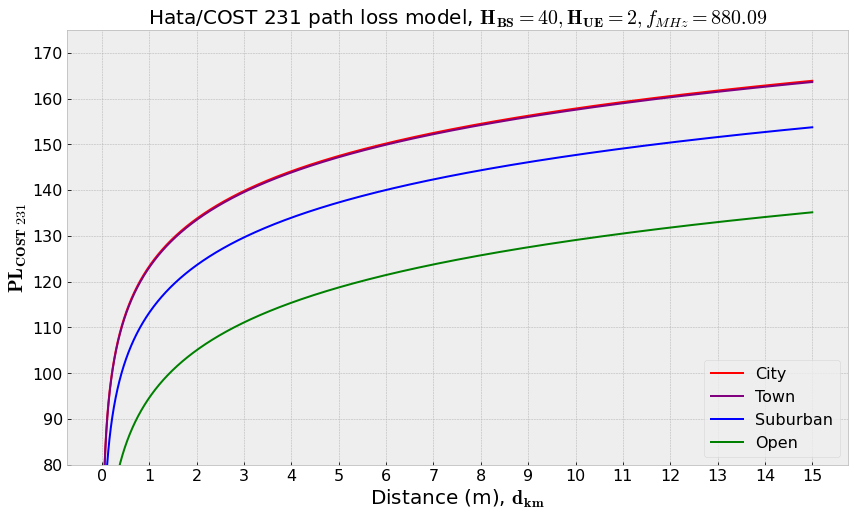

In [4]:
# COST 231 Extension to the Okumura-Hata model
# For NB-IoT Uplink:
f_MHz = 880.09 # MHz

d_km = 1 # km
npd_km = np.arange(0.001,15.001,0.001) # km
#print(npd_km)
h_UE = 2 # meter
h_BS = 40 # meter

# Correction factors for UE antenna height
if 150 < f_MHz and f_MHz < 200:
    a_hUE_city = 8.3 * (math.log10(1.54 * h_UE))**2 - 1.1
else:
    a_hUE_city = 3.2 * (math.log10(11.75 * h_UE))**2 - 5.0 # Must be within 200 MHz < f_MHz < 1500 MHz.

a_hUE_town = 0.8 + (1.1 * math.log10(f_MHz) - 0.7) * h_UE - (1.56 * math.log10(f_MHz))

#print("a_hUE_city: ", a_hUE_city)
#print("a_hUE_town: ", a_hUE_town)

a_hUE_suburban = a_hUE_town + 2 * (math.log10(f_MHz/28))**2 + 5.4
a_hUE_open = a_hUE_town + 4.78 * (math.log10(f_MHz))**2 - (18.3 * math.log10(f_MHz)) + 40.9

A = 69.55 + 26.16 * math.log10(f_MHz) - 13.82 * math.log10(h_BS) 
B = (44.9 - 6.55 * math.log10(h_BS))

PL_COST231_city = []
PL_COST231_town = []
PL_COST231_suburban = []
PL_COST231_open = []

for i in npd_km:
    if i <= 20:
        beta = 1
    else:
        beta = 1 + (0.14 + 1.87 * 10**(-4) * f_MHz + 0.00107 * h_BS) * (math.log10(i/20))**0.8 # valid for distances betwee 20 and 100 km
    PL_COST231_city.append(A - a_hUE_city + B * (math.log10(i))**beta)
    PL_COST231_town.append(A - a_hUE_town + B * (math.log10(i))**beta)
    PL_COST231_suburban.append(A - a_hUE_suburban + B * (math.log10(i))**beta)
    PL_COST231_open.append(A - a_hUE_open + B * (math.log10(i))**beta)
    
#print("Beta is: {}".format(beta))

PL_COST231_city_1km = A - a_hUE_city + B * (math.log10(d_km))**beta
PL_COST231_town_1km = A - a_hUE_town + B * (math.log10(d_km))**beta
PL_COST231_suburban_1km = A - a_hUE_suburban + B * (math.log10(d_km))**beta
PL_COST231_open_1km = A - a_hUE_open + B * (math.log10(d_km))**beta

print("COST/Hata 312 path-loss @ {}km for:".format(d_km))
print("urban city: {:.2f} (dB)".format(PL_COST231_city_1km))
print("urban town: {:.2f} (dB)".format(PL_COST231_town_1km))
print("suburban area: {:.2f} (dB)".format(PL_COST231_suburban_1km))
print("rural/open areas: {:.2f} (dB)".format(PL_COST231_open_1km))
print("\n")

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig = plt.figure(figsize=(14,8))  
ax = fig.add_subplot(111)  
ax.plot(npd_km, PL_COST231_city, color="red", label='City')
ax.plot(npd_km, PL_COST231_town, color="purple", label='Town')
ax.plot(npd_km, PL_COST231_suburban, color="blue", label='Suburban')
ax.plot(npd_km, PL_COST231_open, color="green", label='Open')
ax.set_xlabel('Distance (m), $\mathbf{d_{km}}$', fontsize=20) #, weight='bold') 
ax.set_xticks(np.arange(0,16,1))
ax.set_ylabel('$\mathbf{PL_{COST\ 231}}$', color='k',fontsize=20)  
ax.set_yticks(np.arange(80,175,10))
ax.set_title("Hata/COST 231 path loss model, $\mathbf{H_{BS}=40, H_{UE}=2}, f_{MHz}=880.09$", fontsize=20);
#ax.set_xlim([-5,15])
ax.set_ylim([80,175])
ax.legend(fontsize=16, loc='lower right')
plt.show()

## Chapter 4.1.4.1

### Hata/COST 231 Path Loss 2km, NB-IoT frequency

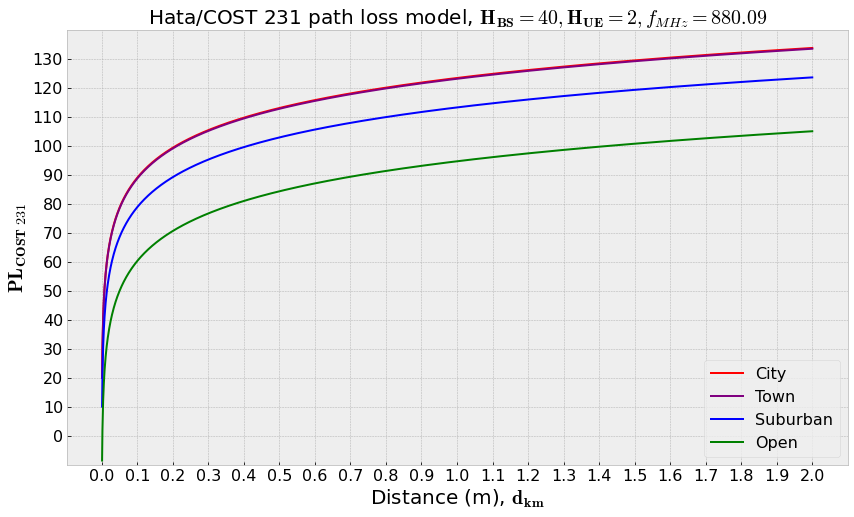

In [5]:
# COST 231 Extension to the Okumura-Hata model
# For NB-IoT Uplink:
f_MHz = 880.09 # MHz

d_km = 1 # km
npd_km = np.arange(0.001,2.001,0.001) # km
#print(npd_km)
h_UE = 2 # meter
h_BS = 40 # meter

# Correction factors for UE antenna height
if 150 < f_MHz and f_MHz < 200:
    a_hUE_city = 8.3 * (math.log10(1.54 * h_UE))**2 - 1.1
else:
    a_hUE_city = 3.2 * (math.log10(11.75 * h_UE))**2 - 5.0 # Must be within 200 MHz < f_MHz < 1500 MHz.

a_hUE_town = 0.8 + (1.1 * math.log10(f_MHz) - 0.7) * h_UE - (1.56 * math.log10(f_MHz))

#print("a_hUE_city: ", a_hUE_city)
#print("a_hUE_town: ", a_hUE_town)

a_hUE_suburban = a_hUE_town + 2 * (math.log10(f_MHz/28))**2 + 5.4
a_hUE_open = a_hUE_town + 4.78 * (math.log10(f_MHz))**2 - (18.3 * math.log10(f_MHz)) + 40.9

A = 69.55 + 26.16 * math.log10(f_MHz) - 13.82 * math.log10(h_BS) 
B = (44.9 - 6.55 * math.log10(h_BS))

PL_COST231_city = []
PL_COST231_town = []
PL_COST231_suburban = []
PL_COST231_open = []

for i in npd_km:
    if i <= 20:
        beta = 1
    else:
        beta = 1 + (0.14 + 1.87 * 10**(-4) * f_MHz + 0.00107 * h_BS) * (math.log10(i/20))**0.8 # valid for distances betwee 20 and 100 km
    PL_COST231_city.append(A - a_hUE_city + B * (math.log10(i))**beta)
    PL_COST231_town.append(A - a_hUE_town + B * (math.log10(i))**beta)
    PL_COST231_suburban.append(A - a_hUE_suburban + B * (math.log10(i))**beta)
    PL_COST231_open.append(A - a_hUE_open + B * (math.log10(i))**beta)
    
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig = plt.figure(figsize=(14,8))  
ax = fig.add_subplot(111)  
ax.plot(npd_km, PL_COST231_city, color="red", label='City')
ax.plot(npd_km, PL_COST231_town, color="purple", label='Town')
ax.plot(npd_km, PL_COST231_suburban, color="blue", label='Suburban')
ax.plot(npd_km, PL_COST231_open, color="green", label='Open')
ax.set_xlabel('Distance (m), $\mathbf{d_{km}}$', fontsize=20) #, weight='bold')
ax.set_xticks(np.arange(0,2.1,0.1))
ax.set_ylabel('$\mathbf{PL_{COST\ 231}}$', color='k',fontsize=20)
ax.set_yticks(np.arange(0,140,10))
ax.set_title("Hata/COST 231 path loss model, $\mathbf{H_{BS}=40, H_{UE}=2}, f_{MHz}=880.09$", fontsize=20);
#ax.set_xlim([-5,15])
ax.set_ylim([-10,140])
ax.legend(fontsize=16) #, loc='lower center')
plt.show()

## Chapter 4.1.4.2-3

### Hata/COST 231 Path Loss, LoRaWAN & TS-UNB frequency

COST/Hata 312 path-loss @ 1km for:
urban city: 123.42 (dB)
urban town: 123.15 (dB)
suburban area: 113.27 (dB)
rural/open areas: 94.69 (dB)




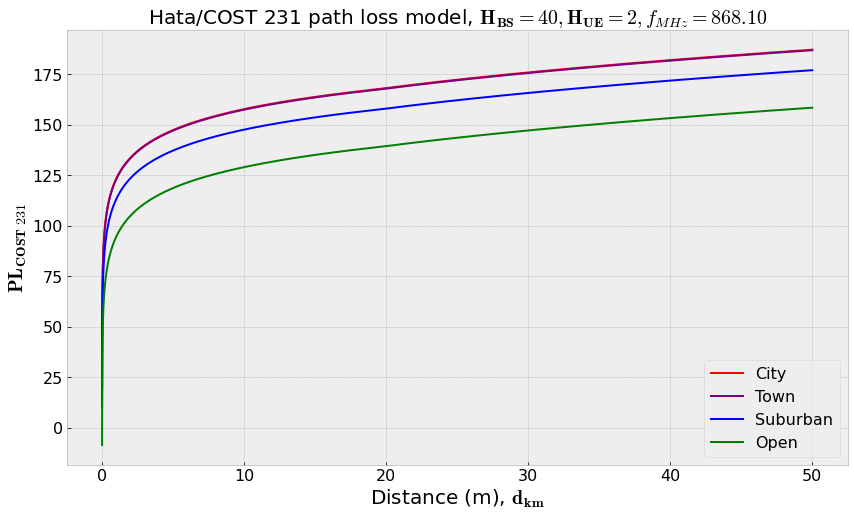

In [6]:
# COST 231 Extension to the Okumura-Hata model
# For LoRa / TS-UNB Uplink:
#f_MHz = 868.10 # MHz
f_MHz = 880.09
d_km = 1 # km
npd_km = np.arange(0.001,50.001,0.001) # km
#print(npd_km)
h_UE = 2 # meter
h_BS = 40 # meter

# Correction factors for UE antenna height
if 150 < f_MHz and f_MHz < 200:
    a_hUE_city = 8.3 * (math.log10(1.54 * h_UE))**2 - 1.1
else:
    a_hUE_city = 3.2 * (math.log10(11.75 * h_UE))**2 - 5.0 # Must be within 200 MHz < f_MHz < 1500 MHz.

a_hUE_town = 0.8 + (1.1 * math.log10(f_MHz) - 0.7) * h_UE - (1.56 * math.log10(f_MHz))

#print("a_hUE_city: ", a_hUE_city)
#print("a_hUE_town: ", a_hUE_town)

a_hUE_suburban = a_hUE_town + 2 * (math.log10(f_MHz/28))**2 + 5.4
a_hUE_open = a_hUE_town + 4.78 * (math.log10(f_MHz))**2 - (18.3 * math.log10(f_MHz)) + 40.9

A = 69.55 + 26.16 * math.log10(f_MHz) - 13.82 * math.log10(h_BS) 
B = (44.9 - 6.55 * math.log10(h_BS))

PL_COST231_city = []
PL_COST231_town = []
PL_COST231_suburban = []
PL_COST231_open = []

for i in npd_km:
    if i <= 20:
        beta = 1
    else:
        beta = 1 + (0.14 + 1.87 * 10**(-4) * f_MHz + 0.00107 * h_BS) * (math.log10(i/20))**0.8 # valid for distances betwee 20 and 100 km
    PL_COST231_city.append(A - a_hUE_city + B * (math.log10(i))**beta)
    PL_COST231_town.append(A - a_hUE_town + B * (math.log10(i))**beta)
    PL_COST231_suburban.append(A - a_hUE_suburban + B * (math.log10(i))**beta)
    PL_COST231_open.append(A - a_hUE_open + B * (math.log10(i))**beta)
    
#print("Beta is: {}".format(beta))

PL_COST231_city_1km = A - a_hUE_city + B * (math.log10(d_km))**beta
PL_COST231_town_1km = A - a_hUE_town + B * (math.log10(d_km))**beta
PL_COST231_suburban_1km = A - a_hUE_suburban + B * (math.log10(d_km))**beta
PL_COST231_open_1km = A - a_hUE_open + B * (math.log10(d_km))**beta

print("COST/Hata 312 path-loss @ {}km for:".format(d_km))
print("urban city: {:.2f} (dB)".format(PL_COST231_city_1km))
print("urban town: {:.2f} (dB)".format(PL_COST231_town_1km))
print("suburban area: {:.2f} (dB)".format(PL_COST231_suburban_1km))
print("rural/open areas: {:.2f} (dB)".format(PL_COST231_open_1km))
print("\n")

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig = plt.figure(figsize=(14,8))  
ax = fig.add_subplot(111)  
ax.plot(npd_km, PL_COST231_city, color="red", label='City')
ax.plot(npd_km, PL_COST231_town, color="purple", label='Town')
ax.plot(npd_km, PL_COST231_suburban, color="blue", label='Suburban')
ax.plot(npd_km, PL_COST231_open, color="green", label='Open')
ax.set_xlabel('Distance (m), $\mathbf{d_{km}}$', fontsize=20) #, weight='bold')  
ax.set_ylabel('$\mathbf{PL_{COST\ 231}}$', color='k',fontsize=20)  
ax.set_title("Hata/COST 231 path loss model, $\mathbf{H_{BS}=40, H_{UE}=2}, f_{MHz}=868.10$", fontsize=20);
#ax.set_xlim([-5,15])
#ax.set_ylim([0.000000000001,0])
ax.legend(fontsize=16) #, loc='lower center')
plt.show()

## Chapter 4.1.4.1

### NB-IoT APL

In [7]:
# NB-IoT. Calculating APL given SNR_reqd for each TBS-index 
B_SC = 15000 # Subcarrier bandwidth in Hz
N_SC = 12 # No. subcarriers
B = B_SC * N_SC # Total channel bandwidth
print("B: ", B)
B_dB = 10 * np.log10(B_SC * N_SC) # Total channel bandwidth in dBs
print("B_dB: ", B_dB)
H_TX = 2 # UE antenna height in meters
H_RX = 20 # eNodeB antenna height in meters
P_TX = 23 # dB
G_TX = 0 # dBi
EIRP = P_TX + G_TX
print("EIRP: ", EIRP)
G_RX = 17 # dBi
k = Boltzmann # Boltzmann constant, k = 1.38064852 × 10^-23 m2 kg s-2 K-1
T = 290 # degrees Kelvin
N0 = 10 * np.log10(k*T*1000) # Thermal Noise normalized per Hz. 1000 mW --> result in dBm
N = N0 + B_dB 
print("N0: ", N0)
NF = 3 # Noise Figure, dB
print("NF: ", NF)
SNR_reqd = [[-3.3, -6.3, -7.2, -7.5, -5.9, -6.5, -7.0, -7.6],
            [-2.5, -3.2, -4.1, -3.8, -4.3, -4.0, -6.0, -6.4],
            [-0.9, -2.2, -2.1, -2.9, -4.0, -4.0, -5.2, -5.4],
            [0.0, -0.5, -1.2, -2.2, -3.1, -3.2, -4.2, -4.0],
            [0.9, -0.1, -0.5, -1.2, -1.7, -1.8, -3.2, -3.7],
            [1.6, 0.5, -0.1, -0.4, -0.9, -1.4, -2.0, -2.6],
            [2.7, 1.6, 0.6, 0.6, 0.0, -0.6, -1.3, -2.0],
            [3.7, 2.7, 1.7, 1.8, 0.6, 0.4, -0.1, -0.8],
            [4.2, 3.6, 2.8, 2.4, 2.1, 1.2, 0.7, -0.1],
            [5.1, 4.5, 3.7, 3.3, 2.8, 2.2, 1.6, 0.7],
            [5.5, 5.2, 4.6, 4.0, 4.0, 2.9, 2.1, 1.7],
            [6.8, 6.5, 6.0, 5.5, 4.9, 3.9, 3.4, 2.8],
            [8.4, 7.8, 7.2, 8.0, 5.7, 5.3, 4.4, 3.8],
            [9.5, 9.3, 8.5, 8.8, 7.0, 6.9, 5.8, 5.2]]
print("\nSNR_reqd table, dB:\n", tabulate(SNR_reqd, floatfmt=".1f"))

P_RXmin = [] # Receiver sensitivity, dB
for i in range(len(SNR_reqd)):
    #print("\nMCS index, i: {}".format(i))
    P_RXmin.append([])
    for j in range(len(SNR_reqd[i])):
        P_RXmin[i].append(round(N0 + B_dB + NF + SNR_reqd[i][j], 1))
        #print("j: {}, SNR_reqd value: {}, P_RXmin: {}".format(j, SNR_reqd[i][j], P_RXmin[i][j]))
print("\nP_RXmin table, dB:\n", tabulate(P_RXmin, floatfmt=".1f"))
G_REP = 3 # 

M_SF = 7 # Shadowing margin, dB
M_I = 4 # Interference margin, dB
M_Total = M_SF + M_I
print("M_Total: ", M_Total)
L_CTX = 0 # TX cable loss, dB
L_CRX = 3 # RX cable loss, dB
L_Total = L_CTX + L_CRX
print("L_Total: ", L_Total)

APL = []
for i in range(len(P_RXmin)):
    #print("\nMCS index, i: {}".format(i))
    APL.append([])
    for j in range(len(P_RXmin[i])):
        
        result = EIRP + G_RX - P_RXmin[i][j] - M_Total - L_Total
        
        APL[i].append(round(result, 1))
        #print("j: {}, P_RXmin value: {}, APL: {}".format(j, P_RXmin[i][j], APL[i][j]))

print("\nAPL table, dB:\n", tabulate(APL, floatfmt=".1f"))



B:  180000
B_dB:  52.552725051033065
EIRP:  23
N0:  -173.97518719422808
NF:  3

SNR_reqd table, dB:
 ----  ----  ----  ----  ----  ----  ----  ----
-3.3  -6.3  -7.2  -7.5  -5.9  -6.5  -7.0  -7.6
-2.5  -3.2  -4.1  -3.8  -4.3  -4.0  -6.0  -6.4
-0.9  -2.2  -2.1  -2.9  -4.0  -4.0  -5.2  -5.4
 0.0  -0.5  -1.2  -2.2  -3.1  -3.2  -4.2  -4.0
 0.9  -0.1  -0.5  -1.2  -1.7  -1.8  -3.2  -3.7
 1.6   0.5  -0.1  -0.4  -0.9  -1.4  -2.0  -2.6
 2.7   1.6   0.6   0.6   0.0  -0.6  -1.3  -2.0
 3.7   2.7   1.7   1.8   0.6   0.4  -0.1  -0.8
 4.2   3.6   2.8   2.4   2.1   1.2   0.7  -0.1
 5.1   4.5   3.7   3.3   2.8   2.2   1.6   0.7
 5.5   5.2   4.6   4.0   4.0   2.9   2.1   1.7
 6.8   6.5   6.0   5.5   4.9   3.9   3.4   2.8
 8.4   7.8   7.2   8.0   5.7   5.3   4.4   3.8
 9.5   9.3   8.5   8.8   7.0   6.9   5.8   5.2
----  ----  ----  ----  ----  ----  ----  ----

P_RXmin table, dB:
 ------  ------  ------  ------  ------  ------  ------  ------
-121.7  -124.7  -125.6  -125.9  -124.3  -124.9  -125.4  -126.0


## Chapter 4.1.4.1, Figure 24

### NB-IoT min. SNR_reqd per I_MSC

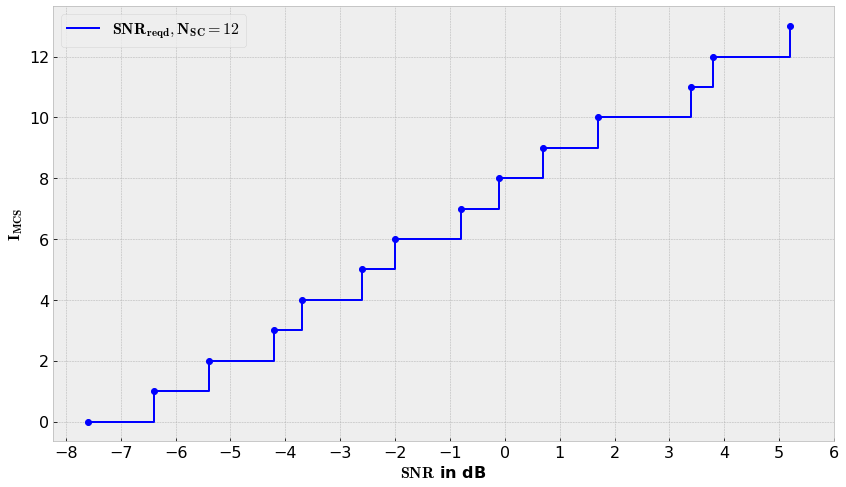

In [8]:
# NB-IoT uplink NPUSCH I_MCS min. SNR_reqd
NB_SNR_reqd = [-7.6, -6.4, -5.4, -4.2, -3.7, -2.6, -2.0, -0.8, -0.1, 0.7, 1.7, 3.4, 3.8, 5.2]
I_MCS = list(range(14))

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig = plt.figure(figsize=(14,8))  
ax = fig.add_subplot(111)  
ax.step(NB_SNR_reqd, I_MCS,'b',label='$\mathbf{SNR_{reqd}, N_{SC}=12}$', where='post')
ax.plot(NB_SNR_reqd, I_MCS,'ob', alpha=1.0)
ax.set_xlabel('$\mathbf{SNR}$ in dB', fontsize=16, weight='bold')  
ax.set_ylabel('$\mathbf{I_{MCS}}$', color='k',fontsize=16)  
ax.set_xticks(np.arange(-8,7,1))
#ax.set_title("QPSK BER to $\mathbf{E_b/N_0}$", fontsize=16, weight='bold');
#ax.set_xlim([-8,7])
#ax.set_ylim([0.000000000001,0])
ax.legend(fontsize=16)
plt.show()

#ber_m6_ind = np.where(ber_qpsk == 0.172291561)
#print(ber_m6_ind)

## Chapter 4.1.4.2

### LoRaWAN APL

In [9]:
# LoRaWAN. Calculating APL given SNR_reqd for each SF. 
B_SC = 125000 # Subcarrier bandwidth in Hz
N_SC = 1 # No. subcarriers
B = B_SC * N_SC # Total channel bandwidth
print("B: ", B)
B_dB = 10 * np.log10(B_SC * N_SC) # Total channel bandwidth in dBs
print("B_dB: ", B_dB)
H_TX = 2 # UE antenna height in meters
H_RX = 40 # eNodeB antenna height in meters
P_TX = 14 # dB
G_TX = 0 # dBi

EIRP = P_TX + G_TX
print("EIRP: ", EIRP)
G_RX = 17 # dBi
k = Boltzmann # Boltzmann constant, k = 1.38064852 × 10^-23 m2 kg s-2 K-1
T = 290 # degrees Kelvin
N0 = 10 * np.log10(k*T*1000) # Thermal Noise normalized per Hz. 1000 mW --> result in dBm
print("N0: ", N0)
N = N0 + B_dB 
print("N: ", N)
NF = 6 # Noise Figure, dB
print("NF: ", NF)

SNR_reqd= [-5, -7.5, -10, -12.5, -15, -17.5, -20]

P_RXmin = [] # Receiver sensitivity, dB
for i in range(len(SNR_reqd)):
    #print("i: ", i)
    #print("SNR_reqd: ", SNR_reqd[i])
    P_RXmin.append(round(N0 + B_dB + NF + SNR_reqd[i], 1))
    print("i: {}, SNR_reqd value: {}, P_RXmin: {}".format(i, SNR_reqd[i], P_RXmin[i]))

M_SF = 7 # Shadowing margin, dB
M_I = 4 # Interference margin, dB
M_Total = M_SF + M_I
print("M_Total: ", M_Total)
L_CTX = 0 # TX cable loss, dB
L_CRX = 3 # RX cable loss, dB
L_Total = L_CTX + L_CRX
print("L_Total: ", L_Total)

APL = []
for i in range(len(P_RXmin)):
    APL.append(round(EIRP + G_RX - P_RXmin[i] - M_Total - L_Total, 1))
    print("i: {}, P_RXmin value: {}, APL: {}".format(i, P_RXmin[i], APL[i]))
print(APL)

B:  125000
B_dB:  50.96910013008056
EIRP:  14
N0:  -173.97518719422808
N:  -123.00608706414752
NF:  6
i: 0, SNR_reqd value: -5, P_RXmin: -122.0
i: 1, SNR_reqd value: -7.5, P_RXmin: -124.5
i: 2, SNR_reqd value: -10, P_RXmin: -127.0
i: 3, SNR_reqd value: -12.5, P_RXmin: -129.5
i: 4, SNR_reqd value: -15, P_RXmin: -132.0
i: 5, SNR_reqd value: -17.5, P_RXmin: -134.5
i: 6, SNR_reqd value: -20, P_RXmin: -137.0
M_Total:  11
L_Total:  3
i: 0, P_RXmin value: -122.0, APL: 139.0
i: 1, P_RXmin value: -124.5, APL: 141.5
i: 2, P_RXmin value: -127.0, APL: 144.0
i: 3, P_RXmin value: -129.5, APL: 146.5
i: 4, P_RXmin value: -132.0, APL: 149.0
i: 5, P_RXmin value: -134.5, APL: 151.5
i: 6, P_RXmin value: -137.0, APL: 154.0
[139.0, 141.5, 144.0, 146.5, 149.0, 151.5, 154.0]


## Chapter 4.1.4.3

### TS-UNB. BER to Eb/N0 for MSK-modulation

[1.30644489e-01 1.30455696e-01 1.30267241e-01 ... 6.83039583e-13
 6.82343795e-13 6.81648716e-13]


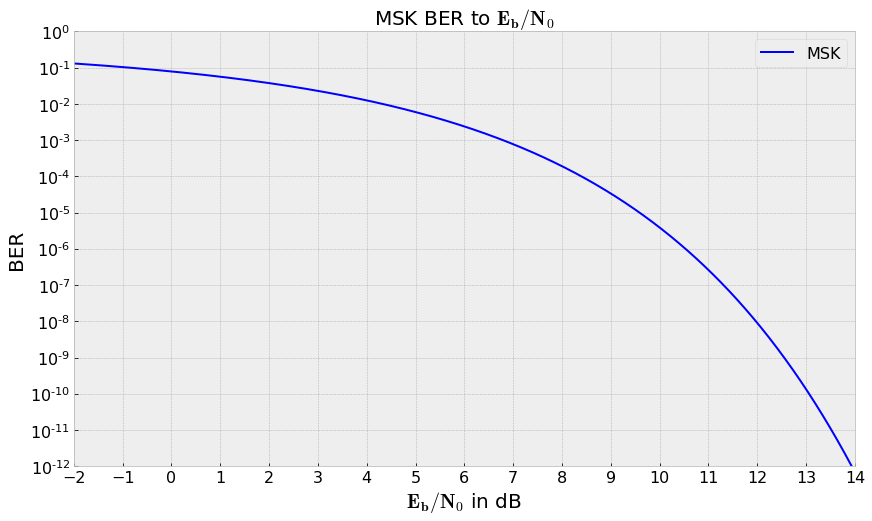

1.0005872838337071e-06
9.995462104378614e-07
Required Eb/N0 for BER of 10^-6: 10.5 dB


In [10]:
# BER to Eb/N0 for MSK:

# https://arxiv.org/ftp/arxiv/papers/1505/1505.05755.pdf
# TS-UNB protocol shall use MSK Modulation or GMSK Modulation with BT = 1.0 in the uplink. TS 103 357
    
    
# An alternate way to approximate the Q-function.
def Q(x):
    return 1/2*scipy.special.erfc(np.sqrt(x))

#QPSK eb/n0:
#base_amplitude = 1
#noise_power_db_gmsk = np.arange(-20, 0.5, 0.01)
#noise_power_qpsk = 10**(noise_power_db_gmsk / 10)
#awgn = komm.AWGNChannel()
#order = 4
#modulation = komm.MSKModulation(order, base_amplitude, phase_offset=np.pi/order)
#awgn.signal_power_qpsk  = modulation.energy_per_symbol
#awgn.snr_qpsk  = awgn.signal_power_qpsk  / noise_power_qpsk
#EbperN0_qpsk  = awgn.snr_qpsk / modulation.bits_per_symbol

EbN0_abs = np.arange(10**(-2.0/10),10**(14.0/10),0.001)

# BER MSK:
ber_msk = Q(EbN0_abs)
print(ber_msk)

log_yticks = []
for i in range(15):
    log_yticks.append(10**(-1*i))

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig = plt.figure(figsize=(14,8))  
ax = fig.add_subplot(111)  
ax.plot((10*np.log10(EbN0_abs)), ber_msk,'b',label='MSK')
ax.set_xlabel('$\mathbf{E_b/N_0}$ in dB', fontsize=20)  
ax.set_ylabel('BER', color='k',fontsize=20)  
ax.set_yscale("log") #the log transformation
ax.set_yticks(log_yticks)
ax.set_xticks(np.arange(-2,15,1))
ax.set_title("MSK BER to $\mathbf{E_b/N_0}$", fontsize=20);
ax.set_xlim([-2,14])
ax.set_ylim([0.000000000001,0])
ax.legend(fontsize=16)
plt.show()

#print(len(ber_msk))
#rint(len(EbN0_abs))
temp = []
for i in ber_msk:
    if i > 0.000000999:
        if i <= 0.000001001:
            print(i)
            temp.append(i)
#print(temp)
ber_m6 = 10 * np.log10(EbN0_abs[np.where(ber_msk == temp[1])])
print("Required Eb/N0 for BER of 10^-6: {:.1f} dB".format(ber_m6[0]))
            
#print(ber_qpsk)
#print(10 * np.log10(EbperN0_qpsk))

#ber_minus6 = ber_qpsk
#print('Eb/N0 for BER of 10^-6 is: {}'.format(ber_minus6))


## Chapter 4.1.4.3

### TS-UNB APL

In [11]:
# TS-UNB. Calculating APL given SNR_reqd for each TBS-index 
B = 60233 # Total channel bandwidth in Hz
B100kHz = 100000 # Total channel bandwidth in Hz, including guard bands between SCs
N_SC = 24 # No. subcarriers
B_SC = B/N_SC # Subcarrier bandwidth
print("B_SC: ", B_SC)
B_SC_dB = 10 * np.log10(B_SC) # Subcarrier bandwidth in dBs
B_dB = 10 * np.log10(B100kHz) # Total channel bandwidth in dBs
print("B_dB: ", B_dB)
H_TX = 2 # UE antenna height in meters
H_RX = 40 # BS antenna height in meters
P_TX = 14 # dB
G_TX = 0 # dBi
EIRP = P_TX + G_TX
print("EIRP: ", EIRP)
G_RX = 6 # dBi
k = Boltzmann # Boltzmann constant, k = 1.38064852 × 10^-23 m2 kg s-2 K-1
T = 290 # degrees Kelvin
N0 = 10 * np.log10(k*T*1000) # Thermal Noise normalized per Hz. 1000 mW --> result in dBm
N = N0 + B_dB
print("N0: ", N0)
NF = 6 # Noise Figure, dB
print("NF: ", NF)

Rb = 2380.371
EbN0 = 10.5
SNR_reqd_ana = EbN0 - (10*np.log10(B100kHz/Rb))
#SNR_reqd_ana = 0.64608
S_mes = -129 # dBm
N = 10**(N0/10) * B100kHz
N_dB = 10*np.log10(N)
print("N_dB: ", N_dB)
SNR_reqd_mes = S_mes - (N_dB + (-10)) # Expected 10 dB higher noise floor.)
print("SNR_reqd_mes: ", SNR_reqd_mes)

P_RXmin_ana = N0 + B_dB + NF + SNR_reqd_ana
P_RXmin_mes = N0 + B_dB + NF + SNR_reqd_mes
print("SNR_reqd Analytical value: {}, P_RXmin: {}".format(SNR_reqd_ana, P_RXmin_ana))
print("SNR_reqd Measured value: {}, P_RXmin: {}".format(SNR_reqd_mes, P_RXmin_mes))

M_SF = 7 # Shadowing margin, dB
M_I = 4 # Interference margin, dB
M_Total = M_SF + M_I
print("M_Total: ", M_Total)
L_CTX = 0 # TX cable loss, dB
L_CRX = 3 # RX cable loss, dB
L_Total = L_CTX + L_CRX
print("L_Total: ", L_Total)

APL_ana = round(EIRP + G_RX - P_RXmin_ana - M_Total - L_Total, 1)
APL_mes = round(EIRP + G_RX - P_RXmin_mes - M_Total - L_Total, 1)
        
print("APL Analytical: {}".format(APL_ana))
print("APL Measured: {}".format(APL_mes))



B_SC:  2509.7083333333335
B_dB:  50.0
EIRP:  14
N0:  -173.97518719422808
NF:  6
N_dB:  -123.97518719422808
SNR_reqd_mes:  4.975187194228084
SNR_reqd Analytical value: -5.733553493737588, P_RXmin: -123.70874068796567
SNR_reqd Measured value: 4.975187194228084, P_RXmin: -113.0
M_Total:  11
L_Total:  3
APL Analytical: 129.7
APL Measured: 119.0


## Chapter 4.1.4.1

### NB-IoT Coverage

In [12]:
# Compare NB-IoT APL to Hata/COST 231 here
# NB-IoT:
#APL Min: 134.9
#APL max: 152.0

temp_ana = {'ind': 0, 'PL': 0}
temp_mes = {'ind': 0, 'PL': 0}

for i, j in enumerate(PL_COST231_open):
    if j <= 134.9:
        #print("i:", i, "j: ", j)
        #temp_ana.append(i)
        temp_ana['ind'] = i
        temp_ana['PL'] = j
    if j <= 152.0:
        #temp_mes.append(i)
        temp_mes['ind'] = i
        temp_mes['PL'] = j

#print("temp_ana:", temp_ana)        
#print("temp_mes:", temp_mes)

d_ana = npd_km[temp_ana['ind']]
d_mes = npd_km[temp_mes['ind']]
print("D for PL of 134.9 dB: {:.2f} km".format(d_ana))
print("D for PL of 152.0 dB: {:.2f} km".format(d_mes))

D for PL of 134.9 dB: 14.74 km
D for PL of 152.0 dB: 37.57 km


## Chapter 4.1.4.2

### LoRaWAN Coverage

In [13]:
# LoRaWAN:
APL = [139.0, 141.5, 144.0, 146.5, 149.0, 151.5, 154.0]

temp_ana = []
d_ana = []
#print(PL_COST231_open[-1])
for k, l in enumerate(APL):
    temp_ana.append({'ind': 0, 'PL': 0})
    for i, j in enumerate(PL_COST231_open):
        if j <= l:
            #print("i:", i, "j: ", j)
            #temp_ana.append(i)
            temp_ana[k]['ind'] = i
            temp_ana[k]['PL'] = j
    d_ana.append(round(npd_km[temp_ana[k]['ind']], 1))
print("d_ana:", d_ana)        

#print("\nAPL table, dB:\n", tabulate(d_ana, floatfmt=".1f"))


#print("D for PL of 126.7 dB: {:.2f} km".format(d_ana))

d_ana: [19.4, 22.3, 25.4, 28.9, 32.6, 36.7, 41.1]


## Chapter 4.1.4.3

### TS-UNB Coverage

In [14]:
# TS-UNB:
#APL Analytical: 129.7
#APL Measured: 119.0

temp_ana = {'ind': 0, 'PL': 0}
temp_mes = {'ind': 0, 'PL': 0}

for i, j in enumerate(PL_COST231_open):
    if j <= 129.7:
        #print("i:", i, "j: ", j)
        #temp_ana.append(i)
        temp_ana['ind'] = i
        temp_ana['PL'] = j
    if j <= 119.0:
        #temp_mes.append(i)
        temp_mes['ind'] = i
        temp_mes['PL'] = j

#print("temp_ana:", temp_ana)        
#print("temp_mes:", temp_mes)

d_ana = npd_km[temp_ana['ind']]
d_mes = npd_km[temp_mes['ind']]
print("D for PL of 129.7 dB: {:.2f} km".format(d_ana))
print("D for PL of 119.0 dB: {:.2f} km".format(d_mes))

D for PL of 129.7 dB: 10.41 km
D for PL of 119.0 dB: 5.09 km


## Chapter 4.2.1

### NB-IoT Power Saving Feature effect on Activity State Durations

In [18]:
# NB-IoT Activity state period analysis for T_RX, T_Idle and T_Sleep_PSM
# T_Sleep is an alternative additional counter for the case that the UE can go to a "light" sleep state during DRX idle time.
# Derived from DRX rules as specified for NB-IoT
# Calculation valid if Message interval is less or equal to TAU Timer T3412
# System Frame Number (SFN) and Hyper SFN (H-SFN) tracking starts from zero at RRC Release.
# Long C-DRX only, currently.
# I-eDRX only, currently.
# Repetitions are not considered.
# Default for FDD.

# -------- Initialization --------
# Parameters for timers:
TX_RX_gap = 3 # ms
RF = 10 # ms, RadioFrame (RF)
SF = 1 # ms, SubFrame (SF)

T_TX = [{"P1a": 40, "P1b": 4, "P2": 4}, # 3s
        {"P1a": 40, "P1b": 4, "P2": 4}, # 15s
        {"P1a": 40, "P1b": 4, "P2": 4}, # 60s
        {"P1a": 40, "P1b": 4, "P2": 4}  # 600s
        ] # ms
T_RX = [{"P1a": 4, "P1b": 1, "P2": 1}, # 3s
        {"P1a": 4, "P1b": 1, "P2": 1}, # 15s
        {"P1a": 4, "P1b": 1, "P2": 1}, # 60s
        {"P1a": 4, "P1b": 1, "P2": 1}  # 600s
        ] # ms
T_Idle = [{"P1a": TX_RX_gap, "P1b": TX_RX_gap, "P2": TX_RX_gap}, # 3s
          {"P1a": TX_RX_gap, "P1b": TX_RX_gap, "P2": TX_RX_gap}, # 15s
          {"P1a": TX_RX_gap, "P1b": TX_RX_gap, "P2": TX_RX_gap}, # 60s
          {"P1a": TX_RX_gap, "P1b": TX_RX_gap, "P2": TX_RX_gap}  # 600s
          ] # ms
T_Sleep = [{"P1a": 0, "P1b": 0, "P2": 0}, # 3s
           {"P1a": 0, "P1b": 0, "P2": 0}, # 15s
           {"P1a": 0, "P1b": 0, "P2": 0}, # 60s
           {"P1a": 0, "P1b": 0, "P2": 0}  # 600s
           ] # ms
T_Sleep_PSM = [{"P1a": 0, "P1b": 0, "P2": 0}, # 3s
           {"P1a": 0, "P1b": 0, "P2": 0}, # 15s
           {"P1a": 0, "P1b": 0, "P2": 0}, # 60s
           {"P1a": 0, "P1b": 0, "P2": 0}  # 600s
           ] # ms, PSM

intervals = [3000, 15000, 60000, 600000] # Max. 4. Atleast until implement dynamic building of msg_int_rem.
# 3 second msg interval. 3000 - 40 - 3 - 4 = 2953 ms,(Interval - msg_TX - TX/RX_switch_gap - Ack_RX) 
# 15 second msg interval. 15000 - 40 - 3 - 4 = 14953 ms
# 60 second msg interval. 60000 - 40 - 3 - 4 = 59953 ms
# 600 second msg interval. 600000 - 40 - 3 - 4 = 599953 ms
msg_int_rem = [{"P1a": intervals[0] - T_TX[0]["P1a"] - TX_RX_gap -T_RX[0]["P1a"], # 3s
            "P1b": intervals[0] - T_TX[0]["P1b"] - TX_RX_gap -T_RX[0]["P1b"], 
            "P2": intervals[0] - T_TX[0]["P2"] - TX_RX_gap -T_RX[0]["P2"]}, 
           {"P1a": intervals[1] - T_TX[1]["P1a"] - TX_RX_gap -T_RX[1]["P1a"], # 15s
            "P1b": intervals[1] - T_TX[1]["P1b"] - TX_RX_gap -T_RX[1]["P1b"], 
            "P2": intervals[1] - T_TX[1]["P2"] - TX_RX_gap -T_RX[1]["P2"]}, 
           {"P1a": intervals[2] - T_TX[2]["P1a"] - TX_RX_gap -T_RX[2]["P1a"], # 60s
            "P1b": intervals[2] - T_TX[2]["P1b"] - TX_RX_gap -T_RX[2]["P1b"], 
            "P2": intervals[2] - T_TX[2]["P2"] - TX_RX_gap -T_RX[2]["P2"]}, 
           {"P1a": intervals[3] - T_TX[3]["P1a"] - TX_RX_gap -T_RX[3]["P1a"], # 600s
            "P1b": intervals[3] - T_TX[3]["P1b"] - TX_RX_gap -T_RX[3]["P1b"], 
            "P2": intervals[3] - T_TX[3]["P2"] - TX_RX_gap -T_RX[3]["P2"]}] # in ms  
print("msg_int_rem", msg_int_rem)

# RRC_Connected
# ----
# RRC Inactivity Timer. RRC Release performed at expiry.
T_RRC_IA = RF*0 # RFs. 
# ----
# DRX Inactivity Timer. Runs prior to C-DRX cycles. 
# Valid values: psf1, psf2, psf3, psf4, psf5, psf6, psf8, psf10, psf20, psf30, psf40, psf50, psf60, psf80, psf100, psf200, psf300, psf500, psf750, psf1280, psf1920, psf2560
T_DRX_IA = SF*8 # SFs, 8 ms. Can have values in 2^x ms, where x ∈ {0,...,14}
# ----
# DRX Inactivity Timer with C-eDRX. Runs prior to C-eDRX cycles. 
# Valid values: 0, 1, 2, 3, 4, 8, 16, 32
T_eDRX_IA = SF*8 # SFs, 8 ms.
# ----
# OnDuration. Duration while actively receiving during C-DRX cycle in RRC Connected state.
# Valid values: psf1, psf2, psf3, psf4, psf5, psf6, psf8, psf10, psf20, psf30, psf40, psf8, psf10, psf20, psf30, psf40, psf50, psf60, psf80, psf100, psf200
OnDur_DRX= SF*4 # SFs, 4 ms.
# ----
# OnDuration. Duration while actively receiving during C-eDRX cycle in RRC Connected state.
# Valid values: 1, 2, 3, 4, 8, 16, 32
OnDur_eDRX = SF*4 # SFs, 4 ms.
# ----
# Long C-DRX cycle length.
# Valid values: sf10, sf20, sf32, sf40, sf60, sf64, sf70, sf80, sf128, sf160, sf256, sf320, sf512, sf640, sf1024, sf1280, sf2048, sf2560
T_LCDRX = SF*256 # SFs, 256 ms.
# ----
# Long C-eDRX cycle length.
# Valid values: sf256, sf512, sf1024, sf1536, sf2048, sf3072, sf4096, sf4608, sf6144, sf7680, sf8192, sf9216 
T_LCeDRX = SF*1024 # SFs, 1024 ms.

# RRC_Idle
# ----
# Number of I-eDRX cycles
# to make up the Active Timer (T3324). 0 to disable I-eDRX in this calculation
N_IeDRX = 2
# ----
# I-eDRX cycle length.
# Valid values: duration of hyper RadioFrames (1024 RFs) by 2^x RFs, where x ∈ {11, ..., 20}:
# 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576
T_IeDRX = RF*2048 # 20480 ms, 
# ----
# Paging Window Timer
# Once within eDRX cycle. MUST BE LESS THAN I-eDRX CYCLE!
# Valid values if RFs: 256, 512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096
T_PW = RF*512 # 5120 ms
# ----
# I-DRX cycle length.
# Valid values: 128, 256, 512 or 1024 RFs.
T_IDRX = RF*128 # 1280 ms, 0 to disable in this calculation
# ----
# Number of I-DRX cycles
# within PTW or to make up the Active Timer (T3324)
# From TS 136 304 chapter 7.1 and 7.3
IMSI = 310170845466094 # international mobile subscriber identity, sourced from wikipedia. 1000110100001100101000111000100000100110111101110
UE_ID = IMSI % 4096 # UE identity (for NB-IoT anchor carrier). => 110111101110
UE_ID_H = UE_ID # 3566, Check! 12 most significant bits of the UE's ID. 110111101110
PTW_start = 256 * (np.floor(UE_ID_H / (T_IeDRX / (RF*1024))) % 4)
PTW_stop = (PTW_start + (T_PW/RF) - 1) % 1024
print("PTW_start:", PTW_start)
print("PTW_stop:", PTW_stop)
# number of POs per DRX cycle across all UEs in the cell. This parameter is broadcasted in the SIB2 message.
# Valid values 4T, 2T, T, T/2, T/4, T/8, T/16, T/32, T/64, T/128, T/256, T/512 and T/1024. T = T_IDRX
nB = (T_IDRX / RF) / 8
N = min((T_IDRX / RF), nB) # Number of Paging Frames within T_IDRX
N_s = max(1, nB / (T_IDRX / RF))
# Calculate N_IDRX and PFs when I-eDRX is enabled:
if N_IeDRX > 0:
    PF_candidate = ((T_IDRX / RF) / N) * (UE_ID % N)
    PF = []
    for i in range(1024):
        #print("PF_candidate: ", PF_candidate)
        if PF_candidate == i % T:
            print("SFN", i,"is a PF")
            PF.append(i)
    N_IDRX = 0
    # Calculation of how many PFs / I-DRX cycles within PTW
    for i in PF:
        if PTW_stop <= PTW_start:
            if i >= PTW_start:
                N_IDRX += 1
            elif i <= PTW_stop:
                N_IDRX += 1
        else:
            if i >= PTW_start and i <= PTW_stop:
                N_IDRX += 1
    if (T_PW/RF) > 1024:
        # If T_PW is more than 1024, add all PFs in full Hyper Frames.
        N_IDRX += len(PF) * ((T_PW / RF) // 1025)
elif T_IDRX > 0:
    PF = ((T_IDRX / RF) / N) * (UE_ID % N)
    N_IDRX = 10 # Enter here how many I-DRX cycles to run. Affects Active Timer T3324 below  
# print("N_IDRX:", N_IDRX)
# ----
# PO index within a PF
# From TS 136 304 chapter 7.2
# Subframe pattern in FDD to determine the PO (Valid for LTE, LTE-M with bandwidth > 3 MHZ, and NB-IoT)
# List item for N_s value, list indeces for i_s. 
I_PO_lookup = {1: [9],
               2: [4, 9],
               4: [0, 4, 5, 9]}
i_s = int(np.floor(UE_ID / N) % N_s)
print("N_s:", N_s,", i_s:", i_s)
I_PO = I_PO_lookup[N_s][i_s]
print("I_PO:", I_PO)
#I_PO = 10 # Active receiving PO within a Paging Frame in an I-DRX cycle.
# ----
# Tracking Area Update (TAU) Timer.
T3412 = 600000 # ms,

# Resulting Timers
# RRC_Idle
# ----
# Active Timer
# Must be less than TAU Timer T3412
if (N_IeDRX != 0): # Using either I-DRX or I-eDRX to make up T3324.
    T3324 = T_IeDRX * N_IeDRX # ms
else:
    T3324 = T_IDRX * N_IDRX # ms
#print("Active Timer, T3324: ", T3324)

        
# -------- Calculation -------- 

for i in range(len(msg_int_rem)): # Run calculation for each interval, i to select interval index in msg_int_rem
    print("\nInterval: ", intervals[i],"ms")
    for key in msg_int_rem[i]: # For each profile specific Remaining-Time-to-Interval value j of msg_int_rem interval index i. Reducted with time spent for msg TX and Ack RX.
        
        # ---- During RRC_CONNECTED ----
        
        print("\t\nProfile: ", key, "\tTime-to-Next-Message: ", msg_int_rem[i][key])
        print("\tAt RRC_Connected state.")
        
        # Is C-DRX/-eDRX enabled for RRC_CONNECTED? Is Inactivity Timer T_RRC_IA enabled?
        if T_RRC_IA > 0:
            print("\t\tRRC Inactivity Timer T_RRC_C is enabled for", T_RRC_IA, "ms.")
            # Is eDRX enabled for RRC_CONNECTED?
            if T_eDRX_IA > 0:
                # Add T_eDRX_IA to T_RX.
                T_RX[i][key] += T_eDRX_IA
                # Sync remaining Rem-T-to-Int
                print("\t\t\tsyncing Rem-T-to-Int with T_eDRX_IA")
                msg_int_rem[i][key] -= T_eDRX_IA
                # Set eDRX values for calculation. Need to write only one block of code.
                T_DRX_IA = T_eDRX_IA
                OnDur_DRX = OnDur_eDRX
                T_LCDRX = T_LCeDRX
                
            # Alternatively, is DRX enabled for RRC_CONNECTED?
            elif T_DRX_IA > 0:
                # Add T_DRX_IA to T_RX.
                T_RX[i][key] += T_DRX_IA
                # Sync remaining Rem-T-to-Int
                print("\t\t\tsyncing Rem-T-to-Int with T_DRX_IA")
                msg_int_rem[i][key] -= T_DRX_IA
            
            # Run calculation for C-DRX/-eDRX.
            # If Rem-T-to-Int is more than RRC Inactivity Timer reduced with DRX Inactivity Timer period
            if msg_int_rem[i][key] < T_RRC_IA - T_DRX_IA:
                print("\t\t\tRem-T-to-Int is less than RRC Inactivity Timer.")
                while msg_int_rem[i][key] > 0: # Run until end of Rem-T-to-Int.
                    # Go through any complete C-DRX/-eDRX cycles.
                    while msg_int_rem[i][key] // T_LCDRX > 0: 
                        print("\t\t\t\tAccumulating T_RX and T_Idle for any full C-DRX/-eDRX.")
                        # Accumulating T_RX and T_Idle of a full C-DRX/-eDRX cycle.
                        T_RX[i][key] += OnDur_DRX
                        T_Idle[i][key] += T_LCDRX - OnDur_DRX
                        print("\t\t\t\tSyncing Rem-T-to-Int with one C-DRX/-eDRX cycle.")
                        msg_int_rem[i][key] -= T_LCDRX # Syncing Rem-T-to-Int for each CDRX cycle
                        # All time in msg_int_rem[i][key] should now be accounted for any complete C-DRX/-eDRX cycles.

                    # If Rem-T-to-Int is less than one C-DRX/eDRX cycle.
                    print("\t\t\tGathering any accumulation to T_RX and T_Idle for any remaining time in T_RRC_IA.")
                    # Check if Rem-T-to-Int is exactly during OnDuration.
                    if msg_int_rem[i][key] <= OnDur_DRX:
                        print("\t\t\t\tRem-T-to-Int:", msg_int_rem[i][key],"is less than or equal to end of OnDuration.")
                        T_RX[i][key] += OnDur_DRX - msg_int_rem[i][key]
                    # No. Rem-T-to-Int is more than OnDuration.
                    else:
                        print("\t\t\t\tRem-T-to-Int:", msg_int_rem[i][key],"is more than OnDuration.")
                        T_RX[i][key] += OnDur_DRX
                        T_Idle[i][key] += msg_int_rem[i][key] - OnDur_DRX
                    # All time in msg_int_rem[i][key] should now be accounted for / "spent".
                    msg_int_rem[i][key] = 0
                    print("\t\t\tRRC_Connected done.")

            else:
                print("\t\t\tRem-T-to-Int is more than RRC Inactivity Timer.")
                T_RRC_IA_rem = T_RRC_IA
                while T_RRC_IA_rem > 0: # Run until end of T_RRC_IA.
                    # Go through any complete C-DRX/-eDRX cycles.
                    while T_RRC_IA_rem // T_LCDRX > 0: 
                        print("\t\t\t\tAccumulating T_RX and T_Idle for any full C-DRX/-eDRX.")
                        # Accumulating T_RX and T_Idle of a full C-DRX/-eDRX cycle.
                        T_RX[i][key] += OnDur_DRX
                        T_Idle[i][key] += T_LCDRX - OnDur_DRX
                        print("\t\t\t\tSyncing Rem-T-to-Int with one C-DRX/-eDRX cycle.")
                        msg_int_rem[i][key] -= T_LCDRX # Syncing Rem-T-to-Int for each C-DRX/-eDRX cycle
                        T_RRC_IA_rem -= T_LCDRX # Syncing remaining T_RRC_IA for each C-DRX/-eDRX cycle
                        # All time in msg_int_rem[i][key] should now be accounted for any complete C-DRX/-eDRX cycles within.

                    # If Rem-T-to-Int is less than one C-DRX/eDRX cycle.
                    print("\t\t\tGathering any accumulation to T_RX and T_Idle for any remaining time in T_RRC_IA.")
                    # Check if T_RRC_IA_rem is exactly during OnDuration.
                    if T_RRC_IA_rem <= OnDur_DRX:
                        print("\t\t\t\tT_RRC_IA_rem:", T_RRC_IA_rem,"is less than or equal to end of OnDuration.")
                        T_RX[i][key] += T_RRC_IA_rem
                        print("\t\t\t\tSyncing Rem-T-to-Int with remaining time in T_RRC_IA.")
                        msg_int_rem[i][key] -= T_RRC_IA_rem
                    # No. T_RRC_IA_rem is more than OnDuration.
                    else:
                        print("\t\t\t\tT_RRC_IA_rem:", T_RRC_IA_rem,"is more than OnDuration.")
                        T_RX[i][key] += OnDur_DRX
                        T_Idle[i][key] += T_RRC_IA_rem - OnDur_DRX
                        print("\t\t\t\tSyncing Rem-T-to-Int with remaining time in T_RRC_IA.")
                        msg_int_rem[i][key] -= T_RRC_IA_rem
                    # All time in T_RRC_IA_rem should now be accounted for / "spent".
                    T_RRC_IA_rem = 0
                
        # RRC Inactivity Timer was set for Immidiate Release or Timer run out.
        # RRC Released here. Start of RRC_Idle state.
        print("\n\tRRC Released. Start of RRC_Idle state.")
        print("\tRem-T-to-Int synced. Now: ", msg_int_rem[i][key])
        # If logic is correct, then msg_int_rem[i][key] should be 0 or a positive number at this point

        # ---- During RRC_IDLE ----
        
        # Is eDRX enabled for RRC_IDLE?
        if N_IeDRX > 0 and msg_int_rem[i][key] > 0: 
            # Perform calculation with I-eDRX.
            # Accumulate any idle time before first I-eDRX cycle H-SFN and sync
            # According to TS 136 304 chapter 7.3.: H-SFN mod T_eDRX = (UE_ID_H mod T_eDRX)
            if msg_int_rem[i][key] > ((UE_ID_H % int(T_IeDRX / (RF*1024))) * 1024 * RF): # ms
                print("\tAccumulating T_Sleep with time prior to I-eDRX cycles: ", (UE_ID_H % int(T_IeDRX / (RF*1024))) * 1024 * RF)
                #T_Idle[i][key] += (UE_ID_H % int(T_IeDRX / (RF*1024))) * 1024 * RF
                T_Sleep[i][key] += (UE_ID_H % int(T_IeDRX / (RF*1024))) * 1024 * RF
                msg_int_rem[i][key] -= (UE_ID_H % int(T_IeDRX / (RF*1024))) * 1024 * RF
                print("\t\tSyncing Rem-T-to-Int by T_Sleep time prior to I-eDRX cycles. Now:", msg_int_rem[i][key])
            else:
                print("\tAccumulating rest of Rem-T-to-Int to T_Sleep :", msg_int_rem[i][key])
                #T_Idle[i][key] += msg_int_rem[i][key]
                T_Sleep[i][key] += msg_int_rem[i][key]
                msg_int_rem[i][key] = 0
            
            # Check if Rem-T-to-Int is more than or equal to T3324 timer deducted with idle time before first I-eDRX H-SFN.
            if msg_int_rem[i][key] >= (T3324-(UE_ID_H % int(T_IeDRX / (RF*1024))) * 1024 * RF): # If Rem-T-to-Int is more than remaining Active Timer T3324
                print("\tRem-T-to-Int:", msg_int_rem[i][key],"is more than Active Timer T3324:", T3324,
                      "deducted with prior idle time before first I-eDRX H-SFN.")
                print("\tAccumulating T_RX and T_Sleep for full I-eDRX cycles.")
                for m in range(N_IeDRX): # Run for all I-eDRX cycles
                    print("\t\tRunning I-eDRX cycle ", N_IeDRX - (N_IeDRX - 1 - m),
                          "out of ", N_IeDRX)
                    for n in range(N_IDRX):
                        print("\t\t\tRunning I-DRX cycle ", N_IDRX - (N_IDRX-1 - n),
                              "out of ", N_IDRX)
                        T_RX[i][key] += 1 # ms (SF).
                    #T_Idle[i][key] += T_IeDRX - N_IDRX # ms (SF)
                    T_Sleep[i][key] += T_IeDRX - N_IDRX # ms (SF)
                # All time in msg_int_rem[i][key] should now be accounted for RX, Idle and Sleep accumulation for full I-eDRX cycles".
                msg_int_rem[i][key] -= T3324 # Syncing Rem-T-to-Int after Active Timer time passed.
                print("\t\tSyncing Rem-T-to-Int with T3324 timer. Now:", msg_int_rem[i][key])
                
                # Accumulating any Rem-T-to-Int to T_Sleep_PSM, capped by TAU timer T3412.
                # If logic is correct, then msg_int_rem should not be negative.
                if msg_int_rem[i][key] > T3412 - T3324:
                    T_Sleep_PSM[i][key] += T3412 - T3324
                    print("\t\tRRC_Idle done. Rem-T-to-Int is longer than TAU period", T3412)
                    print("\t\tAccumulating T_Sleep_PSM by max PSM period T3324 - T3412:",
                          T3412 - T3324, "\tT_Sleep_PSM now: ", T_Sleep_PSM[i][key])
                else:
                    T_Sleep_PSM[i][key] += msg_int_rem[i][key]
                    print("\t\tRRC_Idle done. Accumulating T_Sleep_PSM by rest of Rem-T-to-Int: ",
                          msg_int_rem[i][key], "\tT_Sleep_PSM now: ", T_Sleep_PSM[i][key])
                
            # Rem-T-to-Int is less than T3324 timer.
            elif msg_int_rem[i][key] > 0:
                # Checking for accumulation for any full I-eDRX cycles one-by-one
                while msg_int_rem[i][key] // T_IeDRX > 0: # Loop through any full I-eDRX cycles.
                    print("T_IeDRX // msg_int_rem[i][key] =", T_IeDRX // msg_int_rem[i][key])
                    print("\t\tAccumulating T_RX and T_Sleep for any full I-eDRX cycles.")
                    # Accumulating T_RX and T_Idle for all I-DRX cycles within Paging Window and I-eDRX cycle.
                    for n in range(N_IDRX):
                        print("\t\t\tRunning I-DRX cycle ", N_IDRX - (N_IDRX - 1 - n),
                              "out of ", N_IDRX)
                        T_RX[i][key] += 1 # ms (SF).
                        #T_Idle[i][key] += T_IDRX - 1 # ms (SF)
                        T_Sleep[i][key] += T_IDRX - 1 # ms (SF)
                    msg_int_rem[i][key] -= T_IeDRX #Syncing Rem-T-to-Int with the past I-eDRX cycle.
                    print("\t\tSyncing Rem-T-to-Int with one I-eDRX cycle. Now:", msg_int_rem[i][key])
                print("Exited while-loop for full I-eDRX cycles. Proceeding for rest of Rem-T-to-Int.")
                # All time in msg_int_rem[i][key] should now be accounted for RX, Idle and Sleep accumulation for full I-eDRX cycles".

                # If Rem-T-to-Int is between end of Paging Time Window and end of I-eDRX cycle.
                if msg_int_rem[i][key] >= T_PW and msg_int_rem[i][key] < T_IeDRX: 
                    print("\tRem-T-to-Int:", msg_int_rem[i][key],"is more than Paging Time Window:", T_PW, 
                          "and is less than one I-eDRX cycle:", T_IeDRX)
                    print("\t\tLooping through and accumulating T_RX and T_Sleep by a full set of I-DRX cycles within PTW.")
                    for n in range(N_IDRX):
                        # Accumulating T_RX and T_Idle of a full Paging Window.
                        print("\t\t\tRunning I-DRX cycle ", N_IDRX - (N_IDRX - 1 - n),
                              "out of ", N_IDRX)
                        T_RX[i][key] += 1 # ms (SF).
                        #T_Idle[i][key] += T_IDRX - 1 # ms (SF)
                        T_Sleep[i][key] += T_IDRX - 1 # ms (SF)
                    # Sync Rem-T-to-Int with full Paging Time Window
                    print("\t\tSyncing Rem-T-to-Int with Paging Time Window period. Now:", msg_int_rem[i][key])
                    msg_int_rem[i][key] -= T_PW
                    # Accumulate T_Idle with Rem-T-to-Int
                    print("\t\tAccumulating T_Sleep with Rem-T-to-Int.")
                    #T_Idle[i][key] += msg_int_rem[i][key]
                    T_Sleep[i][key] += msg_int_rem[i][key]
                    # All time in msg_int_rem[i][key] should now be accounted for.
                    msg_int_rem[i][key] = 0
                    print("\t\tRRC_Idle done.")
                    # All time in msg_int_rem[i][key] should now be accounted for.
                    
                # If Rem-T-to-Int is less than Paging Time Window
                else:
                    print("\t\tRem-T-to-Int:", msg_int_rem[i][key],"is less than Paging Time Window:", T_PW)
                                      
                    # First check and account for if Rem-T-to-Int which is less than one IDRX-cycle.
                    # According to TS 136 304 chapter 7.1.: SFN mod T = (T div N)*(UE_ID mod N)
                    # Determine, which PF SFN is next after PTW_start SFN, record index to first_PF:
                    distance = {}
                    print("\t\tDetermining distance to next PF from PTW_start.")
                    for o, p in enumerate(PF):
                        #print("o:", o, "p:", p)
                        if p >= PTW_start:
                            #print(p, "is >= to PTW_start:", PTW_start)
                            distance[o] = p - PTW_start
                        else:
                            #print(p, "is < than PTW_start:", PTW_start)
                            distance[o] = 1024 - PTW_start + p
                    first_PF = min(distance, key=distance.get)
                    print("\t\tTime between PTW_start and first PF is:", distance[first_PF])
                    # Proceed to account for any Rem-T-to-Int between PTW_start and first PF within PTW
                    print("\t\tAccumulating T_Sleep with Rem-T-to-Int between PTW_start and first PF within PTW.")
                    if PF[first_PF] > PTW_start: # When SFN of first PF greater than PTW_start, but 
                        print("PF[first_PF]", PF[first_PF], "> PTW_start", PTW_start)
                        if msg_int_rem[i][key] >= distance[first_PF]:
                            print("msg_int_rem[i][key] >= distance[first_PF]")
                            print(msg_int_rem[i][key], ">=", distance[first_PF])
                            # Accumulate T_Sleep and sync
                            #T_Idle[i][key] += distance[first_PF] - 1
                            T_Sleep[i][key] += distance[first_PF] - 1
                            msg_int_rem[i][key] -= distance[first_PF] - 1
                        else:
                            print("msg_int_rem[i][key] < distance[first_PF]")
                            #T_Idle[i][key] += msg_int_rem[i][key]
                            T_Sleep[i][key] += msg_int_rem[i][key]
                            # All time in msg_int_rem[i][key] should now be accounted for.
                            msg_int_rem[i][key] = 0
                            print("\t\tRRC_Idle done.")
                    else:
                        print("PF[first_PF]", PF[first_PF], "<= PTW_start", PTW_start)
                        if msg_int_rem[i][key] >= 1024 - PTW_start + distance[first_PF]:
                            print("msg_int_rem[i][key] >= 1024 - PTW_start + distance[first_PF] - 1")
                            #T_Idle[i][key] += 1024 - PTW_start + distance[first_PF] - 1
                            T_Sleep[i][key] += 1024 - PTW_start + distance[first_PF] - 1
                            msg_int_rem[i][key] -= 1024 - PTW_start + distance[first_PF] - 1
                        else:
                            print("msg_int_rem[i][key] < 1024 - PTW_start + distance[first_PF] - 1")
                            #T_Idle[i][key] += msg_int_rem[i][key]
                            T_Sleep[i][key] += msg_int_rem[i][key]
                            # All time in msg_int_rem[i][key] should now be accounted for.
                            msg_int_rem[i][key] = 0
                            print("\t\tRRC_Idle done.")
                    
                    # Check and and handle any complete I-DRX cycles
                    if msg_int_rem[i][key] > 0:
                        if msg_int_rem[i][key] // T_IDRX > 0:
                            print("\t\tLooping through", msg_int_rem[i][key] // T_IDRX, "full I-DRX cycle(s).")
                        while msg_int_rem[i][key] // T_IDRX > 0: 
                            # Accumulating T_RX and T_Sleep of a full I-DRX cycle.
                            print("\t\t\tAccumulating T_RX and T_Sleep by a full I-DRX cycle.")
                            T_RX[i][key] += 1 # ms (SF).
                            #T_Idle[i][key] += T_IDRX - 1 # ms (SF)
                            T_Sleep[i][key] += T_IDRX - 1 # ms (SF)
                            msg_int_rem[i][key] -= T_IDRX #Syncing Rem-T-to-Int with the past I-DRX cycle.
                            print("\t\t\tSyncing Rem-T-to-Int with one I-DRX cycle. Now:", msg_int_rem[i][key])
                            # All time in msg_int_rem[i][key] should now be accounted for any complete IDRX_cycles.        
                        
                        # If Rem-T-to-Int is less than a full I-DRX cycle, but more than PO index SF.
                        if msg_int_rem[i][key] < T_IDRX and msg_int_rem[i][key] >= (I_PO + 1):
                            print("\t\t\tRem-T-to-Int:", msg_int_rem[i][key],"is enough for one PO.")
                            print("\t\t\tAccumulating T_RX and T_Sleep by a partial I-DRX cycle.")
                            T_RX[i][key] += 1 # ms (SF).
                            #T_Idle[i][key] += msg_int_rem[i][key] - 1 # ms (SF)
                            T_Sleep[i][key] += msg_int_rem[i][key] - 1 # ms (SF)
                            # All time in msg_int_rem[i][key] should now be accounted for.
                            msg_int_rem[i][key] = 0
                            print("\t\tRRC_Idle done.")  
                        
                        # Check if Rem-T-to-Int is less PO index SF.
                        else:
                            print("\t\t\tRem-T-to-Int:", msg_int_rem[i][key],"is not enough for PO.")
                            print("\t\tAccumulating T_Sleep with any Rem-T-to-Int.")
                            #T_Idle[i][key] += msg_int_rem[i][key]
                            T_Sleep[i][key] += msg_int_rem[i][key]
                            # All time in msg_int_rem[i][key] should now be accounted for.
                            msg_int_rem[i][key] = 0
                            print("\t\tRRC_Idle done.")
        
        # I-eDRX not enabled. Is DRX enabled for RRC_IDLE?
        elif T_IDRX > 0 and msg_int_rem[i][key] > 0:
            pass
            # Perform calculation with I-DRX.
            # Disregard time prior to SFN
            # Copy the I-eDRX part otherwise
            
        # In case I-DRX/-eDRX are both disabled, but there's still Rem-T-to-Int.
        elif N_IDRX == 0 and msg_int_rem[i][key] > 0: 
            print("\tI-DRX/-eDRX not configured. Accumulating rest of Rem-T-to-Int to T_Sleep_PSM.")
            T_Sleep_PSM[i][key] += msg_int_rem[i][key]
            print("\t\tAccumulating time in Sleep by ",
                  msg_int[i][key], "\tT_Sleep_PSM now: ", T_Sleep_PSM[i][key])
        # All time in msg_int_rem[i][key] should now be accounted for by RX, Idle and Sleep accumulation".
        
            
            
        print("\tT_TX:", T_TX[i][key],"\tT_RX:", T_RX[i][key],"\tT_Idle:", T_Idle[i][key],"\tT_Sleep:", T_Sleep[i][key],"\tT_Sleep_PSM:", T_Sleep_PSM[i][key])
        print("\tTotal accumulated time by all states: ", T_TX[i][key] + T_RX[i][key] + T_Idle[i][key] + T_Sleep[i][key] + T_Sleep_PSM[i][key])

print("\nT_TX", T_TX)
print("\nT_RX", T_RX)
print("\nT_Idle", T_Idle)
print("\nT_Sleep", T_Sleep)
print("\nT_Sleep_PSM", T_Sleep_PSM)

msg_int_rem [{'P1a': 2953, 'P1b': 2992, 'P2': 2992}, {'P1a': 14953, 'P1b': 14992, 'P2': 14992}, {'P1a': 59953, 'P1b': 59992, 'P2': 59992}, {'P1a': 599953, 'P1b': 599992, 'P2': 599992}]
PTW_start: 768.0
PTW_stop: 255.0
SFN 112 is a PF
SFN 402 is a PF
SFN 692 is a PF
SFN 982 is a PF
N_s: 1 , i_s: 0
I_PO: 9

Interval:  3000 ms
	
Profile:  P1a 	Time-to-Next-Message:  2953
	At RRC_Connected state.

	RRC Released. Start of RRC_Idle state.
	Rem-T-to-Int synced. Now:  2953
	Accumulating T_Sleep with time prior to I-eDRX cycles:  0
		Syncing Rem-T-to-Int by T_Sleep time prior to I-eDRX cycles. Now: 2953
Exited while-loop for full I-eDRX cycles. Proceeding for rest of Rem-T-to-Int.
		Rem-T-to-Int: 2953 is less than Paging Time Window: 5120
		Determining distance to next PF from PTW_start.
		Time between PTW_start and first PF is: 214.0
		Accumulating T_Sleep with Rem-T-to-Int between PTW_start and first PF within PTW.
PF[first_PF] 982 > PTW_start 768.0
msg_int_rem[i][key] >= distance[first_PF]
2

## Chapter 4.3.1

### LoRaWAN Channel Duty Cycle Analysis, EU865-868 & EU870-875.6 MHz

In [16]:
# Channel Duty cycle analysis of LoRaWAN:
# 8 Channels, BW 125 kHz, EU865-868 & EU870-875.6 MHz – DC 1 %

# Select interval
INT = 3000 # ms
#INT = 15000 # ms
#INT = 60000 # ms
#INT = 600000 # ms

# Simulation run time
T_obs = 3600000 # ms, 1h

#Channels
NoCHs = 8 # EU

#Duty Cycle
DC = 0.01 # 1 % Duty Cycle for EU

# Define message as packets T_ON times in milliseconds. 324.864 ms = Full Frame
#T_ON = [324.864, 324.864, 324.864, 324.864, 201.984] # P1
T_ON = [189.696] # P2
#T_ON = [62.72] # Control (ReqJoin)
T_WAIT = INT - np.sum(T_ON)

# T_OFF timer is: T_OFF = T_ON / DC

# Preparations
chs_T_OFF = np.zeros((NoCHs,), dtype=int) # format with 0s
chs_T_OFF = chs_T_OFF.tolist() # to python list
ch_ind = 0
tx_ind = 0
prev_T = 0
result = 0
SIM_timer = 0

# Run simulation
print("Total packets run in simulation:", np.floor(T_obs/INT))
while SIM_timer != np.floor(T_obs/INT): # no. packets
    print("Packet no. ", SIM_timer)
    print("\tVariables before packet.\n\tch_ind: {}, tx_ind: {}, chs_T_OFF: {}.".format(ch_ind, tx_ind, chs_T_OFF))
    # Conditions for next round. Atleast one channel must have T_OFF = 0:
    if min(chs_T_OFF) != 0:
        result = 2
        #print("\tNo channels with T_OFF = 0")
        #print("\tbreaking")
        break
    
    # Send packet:
    #print("ch_ind: ", ch_ind)
    #print("\tTransmitting packet tx_ind: ", tx_ind)
    chs_T_OFF[ch_ind] += T_ON[tx_ind]/DC
    #print("\tchs_T_OFF[", ch_ind, "]: ", chs_T_OFF[ch_ind])
    # Deduct current packet tx time from T_OFF timers except for channel where just sent (ch_ind) and if already = 0
    #print("\tStarting deduction for-loop.")
    for ind, value in enumerate(chs_T_OFF):
        #print("\tT_OFF deduction. ind: ", ind, "value: ", value)
        if value == 0:
            #print("\t\tT_OFF was already 0. No deduction. continued")
            continue
        elif ind == ch_ind:
            #print("\t\tind was ch_ind: No deduction. continued")
            continue
        # Make sure T_OFF does not go negative
        elif value >= T_ON[tx_ind]:
            #print("\t\tDeducting current packet tx time from other ch T_OFF timers.")
            chs_T_OFF[ind] -= T_ON[tx_ind]
        else:
            chs_T_OFF[ind] = 0
    
    # EU specific, minimum T_OFF rule forced between each packet:
    #print("\tPacket sent. Deducting minimum T_OFF rule 100ms from all ch T_OFF timers.")
    for ind, value in enumerate(chs_T_OFF):
        #print("\tT_OFF deduction. ind: ", ind, "value: ", value)
        if value == 0:
            #print("\t\tT_OFF was already 0. No minT_OFF deduction. continued")
            continue
        elif value >= 100:
            #print("\t\tDeducting minimum T_OFF rule 100ms from ch{} T_OFF timer.".format(ind))
            chs_T_OFF[ind] -= 100
        else:
            #print("\t\tDeducting minimum T_OFF rule 100ms from ch{} T_OFF timer.".format(ind))
            chs_T_OFF[ind] = 0
    
    # If tx_ind == last packet, reduce wait time from all T_OFF timers, and loop back to first packet:
    # Wait time is the time between interval and end of last packet of message.
    #print("\ttx_ind is now: ", tx_ind, "index of last packet is: ", T_ON.index(T_ON[-1]))
    if tx_ind == T_ON.index(T_ON[-1]):
        #print("\t\tAll packets sent for message. Deducting wait time from all ch T_OFF timers.")
        for ind, value in enumerate(chs_T_OFF):
            if value == 0:
                continue
            elif value >= T_WAIT:
                chs_T_OFF[ind] -= T_WAIT
            else:
                chs_T_OFF[ind] = 0
        else:
            tx_ind = 0
            #print("\t\tLooping back to first packet. tx_ind is now:", tx_ind)
    else: 
        # Set next packet to send
        tx_ind += 1
    
    # For the next packet start with the channel with smallest T_OFF time
    # Find the position of the minimum value, search starts from begining of list
    ch_ind = chs_T_OFF.index(min(chs_T_OFF)) 
    #print("ch_ind: ", ch_ind)
    SIM_timer += 1
    #print("T_OFF after tx event ", SIM_timer, ": ", chs_T_OFF)
    print("\tVariables after packet.\n\tch_ind: {}, tx_ind: {}, chs_T_OFF: {}.\n".format(ch_ind, tx_ind, chs_T_OFF))    
    
if result == 2:
    print("\nDuty Cycle not feasible for chosen interval of ", int(INT/1000), "s")
    print("Duty Cycle limit forced additional wait time of {:.2f} ms after {:d} packets.".format(min(chs_T_OFF),SIM_timer))
else:
    print("\nDuty Cycle is feasible for chosen interval of: ", int(INT/1000), "s")

Total packets run in simulation: 1200.0
Packet no.  0
	Variables before packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 0, 0, 0, 0, 0, 0, 0].
	Variables after packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 0, 0, 0, 0, 0, 0].

Packet no.  1
	Variables before packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 0, 0, 0, 0, 0, 0].
	Variables after packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 0, 0, 0, 0, 0].

Packet no.  2
	Variables before packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 0, 0, 0, 0, 0].
	Variables after packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0, 0, 0, 0].

Packet no.  3
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0, 0, 0, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 1

Packet no.  255
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].

Packet no.  256
	Variables before packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].

Packet no.  257
	Variables before packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].
	Variables after packe

Packet no.  312
	Variables before packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].

Packet no.  313
	Variables before packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].
	Variables after packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].

Packet no.  314
	Variables before packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].
	Variables after packe

	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].

Packet no.  390
	Variables before packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].
	Variables after packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].

Packet no.  391
	Variables before packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].
	Variables after packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].

Packet no.  392
	Variables before pack

	Variables after packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].

Packet no.  465
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].

Packet no.  466
	Variables before packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].

Packet no.  467
	Variables before pack

	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].
	Variables after packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 0].

Packet no.  639
	Variables before packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 0].
	Variables after packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].

Packet no.  640
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759

Packet no.  678
	Variables before packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].
	Variables after packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].

Packet no.  679
	Variables before packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].
	Variables after packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].

Packet no.  680
	Variables before packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].
	Variables after packe

Packet no.  743
	Variables before packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].
	Variables after packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 0].

Packet no.  744
	Variables before packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 0].
	Variables after packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].

Packet no.  745
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packe

Packet no.  765
	Variables before packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 0].
	Variables after packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].

Packet no.  766
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].

Packet no.  767
	Variables before packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].
	Variables after packe

	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].

Packet no.  949
	Variables before packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].

Packet no.  950
	Variables before packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 0].
	Variables after packet.
	ch_ind: 6, t

Packet no.  1007
	Variables before packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].
	Variables after packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].

Packet no.  1008
	Variables before packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].
	Variables after packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].

Packet no.  1009
	Variables before packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].
	Variables after pa

Packet no.  1087
	Variables before packet.
	ch_ind: 2, tx_ind: 0, chs_T_OFF: [12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 0].
	Variables after packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].

Packet no.  1088
	Variables before packet.
	ch_ind: 3, tx_ind: 0, chs_T_OFF: [9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 0].
	Variables after packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].

Packet no.  1089
	Variables before packet.
	ch_ind: 4, tx_ind: 0, chs_T_OFF: [6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 0].
	Variables after pa

	Variables before packet.
	ch_ind: 6, tx_ind: 0, chs_T_OFF: [559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0, 0].
	Variables after packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].

Packet no.  1155
	Variables before packet.
	ch_ind: 0, tx_ind: 0, chs_T_OFF: [0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 16059.295999999998, 0].
	Variables after packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].

Packet no.  1156
	Variables before packet.
	ch_ind: 1, tx_ind: 0, chs_T_OFF: [16059.295999999998, 0, 559.2959999999985, 3659.2959999999985, 6759.2959999999985, 9859.295999999998, 12959.295999999998, 0].
	Variables after packet.
	ch_ind: 2,

## Chapter 4.3.1

### LoRaWAN Channel Duty Cycle Analysis, US902-928 MHz

In [17]:
# Uplink Channel Duty Cycle analysis of LoRaWAN:
# 64 Channels, BW 125 kHz, US902-928 MHz

# Select interval
INT = 3000 # ms
#INT = 15000 # ms
#INT = 60000 # ms
#INT = 600000 # ms

# Simulation run time
T_obs = 3600000 # ms, 1h

# Channels
NoCHs = 64 # US, BW < 250 kHz
#noCHs = 8 # US, 250 < BW < 250 kHz

# Duty Cycle
DC = 0.02 # 2 % Duty Cycle for US, BW < 250kHz
#DC = 0.04 # 4 % Duty Cyclefor US, BW <= 500kHz

# Define message as packets T_ON times in milliseconds. 324.864 ms = Full Frame
T_ON = [324.864, 324.864, 324.864, 324.864, 201.984] # P1
#T_ON = [189.696] # P2
#T_ON = [62.72] # Control (ReqJoin)
T_WAIT = INT - np.sum(T_ON)

# T_OFF timer is: T_OFF = T_ON / DC

# Preparations

# Preparations
chs_T_OFF = np.zeros((NoCHs,), dtype=int) # format with 0s
chs_T_OFF = chs_T_OFF.tolist() # to python list
ch_ind = 0
tx_ind = 0
prev_T = 0
result = 0
SIM_timer = 0

# Run simulation
print("Total packets run in simulation:", np.floor(T_obs/INT))
while SIM_timer != np.floor(T_obs/INT): # no. packets
    print("Packet no. ", SIM_timer)
    #print("\tVariables before packet.\n\tch_ind: {}, tx_ind: {}, chs_T_OFF: {}.".format(ch_ind, tx_ind, chs_T_OFF))
    # Conditions for next round. Atleast one channel must have T_OFF = 0:
    if min(chs_T_OFF) != 0:
        result = 2
        #print("\tNo channels with T_OFF = 0")
        #print("\tbreaking")
        break
    
    # Send packet:
    #print("ch_ind: ", ch_ind)
    #print("\tTransmitting packet tx_ind: ", tx_ind)
    chs_T_OFF[ch_ind] += T_ON[tx_ind]/DC
    #print("\tchs_T_OFF[", ch_ind, "]: ", chs_T_OFF[ch_ind])
    # Deduct current packet tx time from T_OFF timers except for channel where just sent (ch_ind) and if already = 0
    #print("\tStarting deduction for-loop.")
    for ind, value in enumerate(chs_T_OFF):
        #print("\tT_OFF deduction. ind: ", ind, "value: ", value)
        if value == 0:
            #print("\t\tT_OFF was already 0. No deduction. continued")
            continue
        elif ind == ch_ind:
            #print("\t\tind was ch_ind: No deduction. continued")
            continue
        # Make sure T_OFF does not go negative
        elif value >= T_ON[tx_ind]:
            #print("\t\tDeducting current packet tx time from other ch T_OFF timers.")
            chs_T_OFF[ind] -= T_ON[tx_ind]
        else:
            chs_T_OFF[ind] = 0
    
    # If tx_ind == last packet, reduce wait time from all T_OFF timers, and loop back to first packet:
    # Wait time is the time between interval and end of last packet of message.
    #print("\ttx_ind is now: ", tx_ind, "index of last packet is: ", T_ON_P1a.index(T_ON_P1a[-1]))
    if tx_ind == T_ON.index(T_ON[-1]):
        print("\t\tAll packets sent for message. Deducting wait time from all ch T_OFF timers.")
        for ind, value in enumerate(chs_T_OFF):
            if value == 0:
                continue
            elif value >= T_WAIT:
                chs_T_OFF[ind] -= T_WAIT
            else:
                chs_T_OFF[ind] = 0
        else:
            tx_ind = 0
            #print("\t\tLooping back to first packet. tx_ind is now:", tx_ind)
    else: 
        # Set next packet to send
        tx_ind += 1
    
    # For the next packet start with the channel with smallest T_OFF time
    # Find the position of the minimum value, search starts from begining of list
    ch_ind = chs_T_OFF.index(min(chs_T_OFF)) 
    #print("ch_ind: ", ch_ind)
    SIM_timer += 1
    #print("T_OFF after tx event ", SIM_timer, ": ", chs_T_OFF)
    print("\tVariables after packet.\n\tch_ind: {}, tx_ind: {}, chs_T_OFF: {}.\n".format(ch_ind, tx_ind, chs_T_OFF))    
    
if result == 2:
    print("\nDuty Cycle not feasible for chosen interval of ", INT)
    print("Duty Cycle forced additional wait time of {:.2f} ms after {:d} packets.".format(min(chs_T_OFF),SIM_timer))
else:
    print("\nDuty Cycle is feasible for chosen interval of: ", INT)

Total packets run in simulation: 1200.0
Packet no.  0
	Variables after packet.
	ch_ind: 1, tx_ind: 1, chs_T_OFF: [16243.199999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  1
	Variables after packet.
	ch_ind: 2, tx_ind: 2, chs_T_OFF: [15918.336, 16243.199999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  2
	Variables after packet.
	ch_ind: 3, tx_ind: 3, chs_T_OFF: [15593.472, 15918.336, 16243.199999999999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  3
	Variables after packet.
	ch_ind: 4, tx_ind: 4, chs_T_OFF: [15268.6

		All packets sent for message. Deducting wait time from all ch T_OFF timers.
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [13568.064, 13892.928, 14217.792, 14542.655999999999, 7568.064000000003, 0, 0, 0, 0, 10568.064000000002, 1568.0640000000042, 1892.9280000000042, 2217.792000000005, 2542.6560000000054, 7892.928000000003, 4568.064000000004, 4892.9280000000035, 5217.792000000004, 5542.656000000004, 10892.928000000002, 8217.792000000003, 8542.656000000003, 2600.640000000003, 8600.640000000001, 11217.792000000001, 11542.656, 5600.640000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  65
	Variables after packet.
	ch_ind: 6, tx_ind: 1, chs_T_OFF: [13243.2, 13568.064, 13892.928, 14217.792, 7243.2000000000035, 16243.199999999999, 0, 0, 0, 10243.200000000003, 1243.2000000000041, 1568.0640000000042, 1892.9280000000049, 2217.7920000000054, 7568.064000000003, 4243.200000000004, 4568.064000000004, 4

	Variables after packet.
	ch_ind: 11, tx_ind: 1, chs_T_OFF: [10243.200000000003, 10568.064000000002, 10892.928000000002, 11217.792000000001, 4243.200000000004, 13243.2, 13568.064, 13892.928, 14217.792, 7243.2000000000035, 16243.199999999999, 0, 0, 0, 4568.064000000004, 1243.2000000000041, 1568.0640000000042, 1892.9280000000049, 2217.7920000000054, 7568.064000000003, 4892.928000000004, 5217.792000000004, 0, 5275.776000000003, 7892.9280000000035, 8217.792000000003, 2275.776000000003, 8275.776000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  131
	Variables after packet.
	ch_ind: 12, tx_ind: 2, chs_T_OFF: [9918.336000000003, 10243.200000000003, 10568.064000000002, 10892.928000000002, 3918.3360000000043, 12918.336000000001, 13243.2, 13568.064, 13892.928, 6918.336000000004, 15918.336, 16243.199999999999, 0, 0, 4243.200000000004, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 724

	Variables after packet.
	ch_ind: 7, tx_ind: 2, chs_T_OFF: [12918.336000000001, 13243.2, 13568.064, 13892.928, 6918.336000000004, 15918.336, 16243.199999999999, 0, 0, 9918.336000000003, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 7243.2000000000035, 3918.3360000000043, 4243.200000000004, 4568.064000000005, 4892.928000000004, 10243.200000000003, 7568.064000000004, 7892.9280000000035, 7950.912000000002, 1950.912000000003, 10568.064000000002, 10892.928000000002, 0, 4950.912000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  217
	Variables after packet.
	ch_ind: 8, tx_ind: 3, chs_T_OFF: [12593.472000000002, 12918.336000000001, 13243.2, 13568.064, 6593.472000000004, 15593.472, 15918.336, 16243.199999999999, 0, 9593.472000000003, 593.4720000000041, 918.3360000000041, 1243.2000000000048, 1568.0640000000053, 6918.336000000004, 3593.4720000000043, 3918.3360000000043, 4243.20000000

	Variables after packet.
	ch_ind: 26, tx_ind: 4, chs_T_OFF: [12268.608000000002, 12593.472000000002, 12918.336000000001, 13243.2, 6268.608000000005, 15268.608, 15593.472, 15918.336, 16243.199999999999, 9268.608000000004, 268.6080000000041, 593.4720000000041, 918.3360000000048, 1243.2000000000053, 6593.472000000004, 3268.6080000000043, 3593.4720000000043, 3918.3360000000052, 4243.200000000005, 9593.472000000003, 6918.336000000005, 7243.200000000004, 7301.184000000003, 1301.184000000003, 9918.336000000003, 10243.200000000003, 0, 4301.184000000004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  279
		All packets sent for message. Deducting wait time from all ch T_OFF timers.
	Variables after packet.
	ch_ind: 10, tx_ind: 0, chs_T_OFF: [10568.064000000002, 10892.928000000002, 11217.792000000001, 11542.656, 4568.064000000004, 13568.064, 13892.928, 14217.792, 14542.655999999999, 7568.064000000003, 0, 0, 0, 0, 4892.9280

Packet no.  364
		All packets sent for message. Deducting wait time from all ch T_OFF timers.
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [13568.064, 13892.928, 14217.792, 14542.655999999999, 7568.064000000003, 0, 0, 0, 0, 10568.064000000002, 1568.0640000000042, 1892.9280000000042, 2217.792000000005, 2542.6560000000054, 7892.928000000003, 4568.064000000004, 4892.9280000000035, 5217.792000000004, 5542.656000000004, 10892.928000000002, 8217.792000000003, 8542.656000000003, 2600.640000000003, 8600.640000000001, 11217.792000000001, 11542.656, 5600.640000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  365
	Variables after packet.
	ch_ind: 6, tx_ind: 1, chs_T_OFF: [13243.2, 13568.064, 13892.928, 14217.792, 7243.2000000000035, 16243.199999999999, 0, 0, 0, 10243.200000000003, 1243.2000000000041, 1568.0640000000042, 1892.9280000000049, 2217.7920000000054, 7568.064000000003, 4243.200000000004, 456

	Variables after packet.
	ch_ind: 23, tx_ind: 4, chs_T_OFF: [15268.608, 15593.472, 15918.336, 16243.199999999999, 9268.608000000004, 268.6080000000041, 593.4720000000041, 918.3360000000048, 1243.2000000000053, 12268.608000000002, 3268.6080000000043, 3593.4720000000043, 3918.3360000000052, 4243.200000000005, 9593.472000000003, 6268.608000000005, 6593.472000000004, 6918.336000000005, 7243.200000000004, 12593.472000000002, 9918.336000000003, 10243.200000000003, 4301.184000000004, 0, 12918.336000000001, 13243.2, 7301.184000000003, 1301.184000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  424
		All packets sent for message. Deducting wait time from all ch T_OFF timers.
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [13568.064, 13892.928, 14217.792, 14542.655999999999, 7568.064000000003, 0, 0, 0, 0, 10568.064000000002, 1568.0640000000042, 1892.9280000000042, 2217.792000000005, 2542.6560000000054, 7

	Variables after packet.
	ch_ind: 16, tx_ind: 1, chs_T_OFF: [7243.2000000000035, 7568.064000000003, 7892.9280000000035, 8217.792000000003, 1243.2000000000041, 10243.200000000003, 10568.064000000002, 10892.928000000002, 11217.792000000001, 4243.200000000004, 13243.2, 13568.064, 13892.928, 14217.792, 1568.0640000000042, 16243.199999999999, 0, 0, 0, 4568.064000000004, 1892.9280000000049, 2217.7920000000054, 8275.776000000002, 2275.776000000003, 4892.928000000004, 5217.792000000004, 0, 5275.776000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  496
	Variables after packet.
	ch_ind: 17, tx_ind: 2, chs_T_OFF: [6918.336000000004, 7243.2000000000035, 7568.064000000004, 7892.9280000000035, 918.3360000000041, 9918.336000000003, 10243.200000000003, 10568.064000000002, 10892.928000000002, 3918.3360000000043, 12918.336000000001, 13243.2, 13568.064, 13892.928, 1243.2000000000041, 15918.336, 16243.199999999999, 0, 0, 424

Packet no.  545
	Variables after packet.
	ch_ind: 6, tx_ind: 1, chs_T_OFF: [13243.2, 13568.064, 13892.928, 14217.792, 7243.2000000000035, 16243.199999999999, 0, 0, 0, 10243.200000000003, 1243.2000000000041, 1568.0640000000042, 1892.9280000000049, 2217.7920000000054, 7568.064000000003, 4243.200000000004, 4568.064000000004, 4892.928000000004, 5217.792000000004, 10568.064000000002, 7892.9280000000035, 8217.792000000003, 2275.776000000003, 8275.776000000002, 10892.928000000002, 11217.792000000001, 5275.776000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  546
	Variables after packet.
	ch_ind: 7, tx_ind: 2, chs_T_OFF: [12918.336000000001, 13243.2, 13568.064, 13892.928, 6918.336000000004, 15918.336, 16243.199999999999, 0, 0, 9918.336000000003, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 7243.2000000000035, 3918.3360000000043, 4243.200000000004, 4568.064000000005, 4892.92800

Packet no.  612
	Variables after packet.
	ch_ind: 13, tx_ind: 3, chs_T_OFF: [9593.472000000003, 9918.336000000003, 10243.200000000003, 10568.064000000002, 3593.4720000000043, 12593.472000000002, 12918.336000000001, 13243.2, 13568.064, 6593.472000000004, 15593.472, 15918.336, 16243.199999999999, 0, 3918.3360000000043, 593.4720000000041, 918.3360000000041, 1243.2000000000048, 1568.0640000000053, 6918.336000000004, 4243.200000000005, 4568.064000000005, 0, 4626.048000000003, 7243.200000000004, 7568.064000000004, 1626.048000000003, 7626.0480000000025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  613
	Variables after packet.
	ch_ind: 22, tx_ind: 4, chs_T_OFF: [9268.608000000004, 9593.472000000003, 9918.336000000003, 10243.200000000003, 3268.6080000000043, 12268.608000000002, 12593.472000000002, 12918.336000000001, 13243.2, 6268.608000000005, 15268.608, 15593.472, 15918.336, 16243.199999999999, 3593.4720000000043, 26

Packet no.  702
	Variables after packet.
	ch_ind: 13, tx_ind: 3, chs_T_OFF: [9593.472000000003, 9918.336000000003, 10243.200000000003, 10568.064000000002, 3593.4720000000043, 12593.472000000002, 12918.336000000001, 13243.2, 13568.064, 6593.472000000004, 15593.472, 15918.336, 16243.199999999999, 0, 3918.3360000000043, 593.4720000000041, 918.3360000000041, 1243.2000000000048, 1568.0640000000053, 6918.336000000004, 4243.200000000005, 4568.064000000005, 4626.048000000003, 0, 7243.200000000004, 7568.064000000004, 7626.0480000000025, 1626.048000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  703
	Variables after packet.
	ch_ind: 23, tx_ind: 4, chs_T_OFF: [9268.608000000004, 9593.472000000003, 9918.336000000003, 10243.200000000003, 3268.6080000000043, 12268.608000000002, 12593.472000000002, 12918.336000000001, 13243.2, 6268.608000000005, 15268.608, 15593.472, 15918.336, 16243.199999999999, 3593.4720000000043, 26

		All packets sent for message. Deducting wait time from all ch T_OFF timers.
	Variables after packet.
	ch_ind: 5, tx_ind: 0, chs_T_OFF: [13568.064, 13892.928, 14217.792, 14542.655999999999, 7568.064000000003, 0, 0, 0, 0, 10568.064000000002, 1568.0640000000042, 1892.9280000000042, 2217.792000000005, 2542.6560000000054, 7892.928000000003, 4568.064000000004, 4892.9280000000035, 5217.792000000004, 5542.656000000004, 10892.928000000002, 8217.792000000003, 8542.656000000003, 2600.640000000003, 8600.640000000001, 11217.792000000001, 11542.656, 5600.640000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  785
	Variables after packet.
	ch_ind: 6, tx_ind: 1, chs_T_OFF: [13243.2, 13568.064, 13892.928, 14217.792, 7243.2000000000035, 16243.199999999999, 0, 0, 0, 10243.200000000003, 1243.2000000000041, 1568.0640000000042, 1892.9280000000049, 2217.7920000000054, 7568.064000000003, 4243.200000000004, 4568.064000000004, 


Packet no.  870
	Variables after packet.
	ch_ind: 1, tx_ind: 1, chs_T_OFF: [16243.199999999999, 0, 0, 0, 10243.200000000003, 1243.2000000000041, 1568.0640000000042, 1892.9280000000049, 2217.7920000000054, 13243.2, 4243.200000000004, 4568.064000000004, 4892.928000000004, 5217.792000000004, 10568.064000000002, 7243.2000000000035, 7568.064000000003, 7892.9280000000035, 8217.792000000003, 13568.064, 10892.928000000002, 11217.792000000001, 0, 5275.776000000003, 13892.928, 14217.792, 2275.776000000003, 8275.776000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  871
	Variables after packet.
	ch_ind: 2, tx_ind: 2, chs_T_OFF: [15918.336, 16243.199999999999, 0, 0, 9918.336000000003, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 12918.336000000001, 3918.3360000000043, 4243.200000000004, 4568.064000000005, 4892.928000000004, 10243.200000000003, 6918.336000000004, 7243.2000000000035, 7

	Variables after packet.
	ch_ind: 12, tx_ind: 2, chs_T_OFF: [9918.336000000003, 10243.200000000003, 10568.064000000002, 10892.928000000002, 3918.3360000000043, 12918.336000000001, 13243.2, 13568.064, 13892.928, 6918.336000000004, 15918.336, 16243.199999999999, 0, 0, 4243.200000000004, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 7243.2000000000035, 4568.064000000005, 4892.928000000004, 0, 4950.912000000003, 7568.064000000004, 7892.9280000000035, 1950.912000000003, 7950.912000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  912
	Variables after packet.
	ch_ind: 13, tx_ind: 3, chs_T_OFF: [9593.472000000003, 9918.336000000003, 10243.200000000003, 10568.064000000002, 3593.4720000000043, 12593.472000000002, 12918.336000000001, 13243.2, 13568.064, 6593.472000000004, 15593.472, 15918.336, 16243.199999999999, 0, 3918.3360000000043, 593.4720000000041, 918.3360000000041, 1243.200000


Packet no.  991
	Variables after packet.
	ch_ind: 2, tx_ind: 2, chs_T_OFF: [15918.336, 16243.199999999999, 0, 0, 9918.336000000003, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 12918.336000000001, 3918.3360000000043, 4243.200000000004, 4568.064000000005, 4892.928000000004, 10243.200000000003, 6918.336000000004, 7243.2000000000035, 7568.064000000004, 7892.9280000000035, 13243.2, 10568.064000000002, 10892.928000000002, 0, 4950.912000000003, 13568.064, 13892.928, 1950.912000000003, 7950.912000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  992
	Variables after packet.
	ch_ind: 3, tx_ind: 3, chs_T_OFF: [15593.472, 15918.336, 16243.199999999999, 0, 9593.472000000003, 593.4720000000041, 918.3360000000041, 1243.2000000000048, 1568.0640000000053, 12593.472000000002, 3593.4720000000043, 3918.3360000000043, 4243.200000000005, 4568.064000000005, 9918.336000000003, 6593.472000000004

Packet no.  1076
	Variables after packet.
	ch_ind: 24, tx_ind: 2, chs_T_OFF: [918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 12918.336000000001, 3918.3360000000043, 4243.200000000004, 4568.064000000005, 4892.928000000004, 15918.336, 6918.336000000004, 7243.2000000000035, 7568.064000000004, 7892.9280000000035, 13243.2, 9918.336000000003, 10243.200000000003, 10568.064000000002, 10892.928000000002, 16243.199999999999, 13568.064, 13892.928, 7950.912000000002, 1950.912000000003, 0, 0, 0, 4950.912000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  1077
	Variables after packet.
	ch_ind: 25, tx_ind: 3, chs_T_OFF: [593.4720000000041, 918.3360000000041, 1243.2000000000048, 1568.0640000000053, 12593.472000000002, 3593.4720000000043, 3918.3360000000043, 4243.200000000005, 4568.064000000005, 15593.472, 6593.472000000004, 6918.336000000004, 7243.200000000004, 7568.064000000004, 12918.3360

	Variables after packet.
	ch_ind: 12, tx_ind: 2, chs_T_OFF: [9918.336000000003, 10243.200000000003, 10568.064000000002, 10892.928000000002, 3918.3360000000043, 12918.336000000001, 13243.2, 13568.064, 13892.928, 6918.336000000004, 15918.336, 16243.199999999999, 0, 0, 4243.200000000004, 918.3360000000041, 1243.2000000000041, 1568.0640000000049, 1892.9280000000053, 7243.2000000000035, 4568.064000000005, 4892.928000000004, 4950.912000000003, 0, 7568.064000000004, 7892.9280000000035, 7950.912000000002, 1950.912000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

Packet no.  1182
	Variables after packet.
	ch_ind: 13, tx_ind: 3, chs_T_OFF: [9593.472000000003, 9918.336000000003, 10243.200000000003, 10568.064000000002, 3593.4720000000043, 12593.472000000002, 12918.336000000001, 13243.2, 13568.064, 6593.472000000004, 15593.472, 15918.336, 16243.199999999999, 0, 3918.3360000000043, 593.4720000000041, 918.3360000000041, 1243.20000

## Chapter 4.4.1

### NB-IoT Data Rate

In [15]:
# Calculating Peak Physical Data Rate R_PhyP for each TBS index
N_rep = 1 # 1 repetition
T_RU_12 = 1 # ms with 12 subcarriers
N_RU_min = [1, 2, 3, 4, 5, 6, 8, 10]
T_min12 = []

for i in N_RU_min:
    T_min12.append(N_rep * i * T_RU_12)
#print("T_min12: ", T_min12)
    
    
I_TBS = [[16, 32, 56, 88, 120, 152, 208, 256],
         [24, 56, 88, 144, 176, 208, 256, 344],
         [32, 72, 144, 176, 208, 256, 328, 424],
         [40, 104, 176, 208, 256, 328, 440, 568],
         [56, 120, 208, 256, 328, 408, 552, 680],
         [72, 144, 224, 328, 424, 504, 680, 872],
         [88, 176, 256, 392, 504, 600, 808, 1000],
         [104, 224, 328, 472, 584, 712, 1000, 1224],
         [120, 256, 392, 536, 680, 808, 1096, 1384],
         [136, 296, 456, 616, 776, 936, 1256, 1544],
         [144, 328, 504, 680, 872, 1000, 1384, 1736],
         [176, 376, 584, 776, 1000, 1192, 1608, 2024],
         [208, 440, 680, 1000, 1128, 1352, 1800, 2280],
         [224, 488, 744, 1032, 1256, 1544, 2024, 2536]]

R_PhyP = []

#print(I_TBS[7][2])

for i in range(len(I_TBS)):
    #print("\nMCS index, i: {}".format(i))
    R_PhyP.append([])
    for j in range(len(I_TBS[i])):
        R_PhyP[i].append(round((I_TBS[i][j]+24)/T_min12[j], 1)) # 24 bit CRC
        #print("j: {}, I_TBS value/T_min12: {}/{}, R_PhyP: {}".format(j, I_TBS[i][j], T_min12[j], R_PhyP[i][j]))
        
    #print(R_PhyP)

print("R_PhyP table (kbps):\n", tabulate(R_PhyP, floatfmt=".1f"))

# Calculating Physical data rate:

# Adding scheduling cycle overhead from
#      NPDCCH DCI/(NACK) = N_rep * 1 ms
#      Transmission Gap after DL = 8 ms
#      Transmission Gap after UL = 3 ms

T_SigOvh_min12 = []

for i in N_RU_min:
    T_SigOvh_min12.append(N_rep * i * T_RU_12 + 1 + 8 + 3)
#print("T_min12: ", T_min12)

R_Phy = []

for i in range(len(I_TBS)):
    #print("\nMCS index, i: {}".format(i))
    R_Phy.append([])
    for j in range(len(I_TBS[i])):
        R_Phy[i].append(round((I_TBS[i][j]+24)/T_SigOvh_min12[j], 1))
        #print("j: {}, I_TBS value/T_SigOvh_min12: {}/{}, R_PhyP: {}".format(j, I_TBS[i][j], T_SigOvh_min12[j], R_Phy[i][j]))

print("\nR_Phy table (kbps):\n", tabulate(R_Phy, floatfmt=".1f"))


# Calculating MAC-layer data rate:

# Deducting PDCP, RLC and MAC layer overheads from each TBS

#      PDCP: 1 Byte
#      RLC: 2 Bytes
#      MAC: 2 Bytes

R_MAC = []

for i in range(len(I_TBS)):
    #print("\nMCS index, i: {}".format(i))
    R_MAC.append([])
    for j in range(len(I_TBS[i])):
        R_MAC[i].append(round((I_TBS[i][j]-8*(1+2+2)+24)/T_SigOvh_min12[j], 1))
        #print("j: {}, I_TBS value - OVH / T_SigOvh_min12: {}/{}, R_MAC: {}".format(j, I_TBS[i][j], T_SigOvh_min12[j], R_MAC[i][j]))

print("\nR_MAC table (kbps):\n", tabulate(R_MAC, floatfmt=".1f"))


R_PhyP table (kbps):
 -----  -----  -----  -----  -----  -----  -----  -----
 40.0   28.0   26.7   28.0   28.8   29.3   29.0   28.0
 48.0   40.0   37.3   42.0   40.0   38.7   35.0   36.8
 56.0   48.0   56.0   50.0   46.4   46.7   44.0   44.8
 64.0   64.0   66.7   58.0   56.0   58.7   58.0   59.2
 80.0   72.0   77.3   70.0   70.4   72.0   72.0   70.4
 96.0   84.0   82.7   88.0   89.6   88.0   88.0   89.6
112.0  100.0   93.3  104.0  105.6  104.0  104.0  102.4
128.0  124.0  117.3  124.0  121.6  122.7  128.0  124.8
144.0  140.0  138.7  140.0  140.8  138.7  140.0  140.8
160.0  160.0  160.0  160.0  160.0  160.0  160.0  156.8
168.0  176.0  176.0  176.0  179.2  170.7  176.0  176.0
200.0  200.0  202.7  200.0  204.8  202.7  204.0  204.8
232.0  232.0  234.7  256.0  230.4  229.3  228.0  230.4
248.0  256.0  256.0  264.0  256.0  261.3  256.0  256.0
-----  -----  -----  -----  -----  -----  -----  -----

R_Phy table (kbps):
 ----  ----  ----  ----  ----  ----  -----  -----
 3.1   4.0   5.3   7.0   8.